In [1]:
from bound_probs.utils.data import get_dataset
from bound_probs.cogmodels import build_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Increase font size for better visibility in plots
sns.set_context("paper", font_scale=1.5)

In [2]:
df = get_dataset()

In [3]:
palette = sns.color_palette('icefire', 3)
palette

[(0.25423116, 0.40433127, 0.78155831),
 (0.12284806, 0.1179729, 0.11772022),
 (0.72401436, 0.20691287, 0.25027366)]

In [4]:
palette = sns.color_palette('icefire', 3)

sns.relplot(df.reset_index(), col='subject', hue='probRange', style='noiseType', col_wrap=5,
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin2', y='certaintyEquivalent', kind='line')

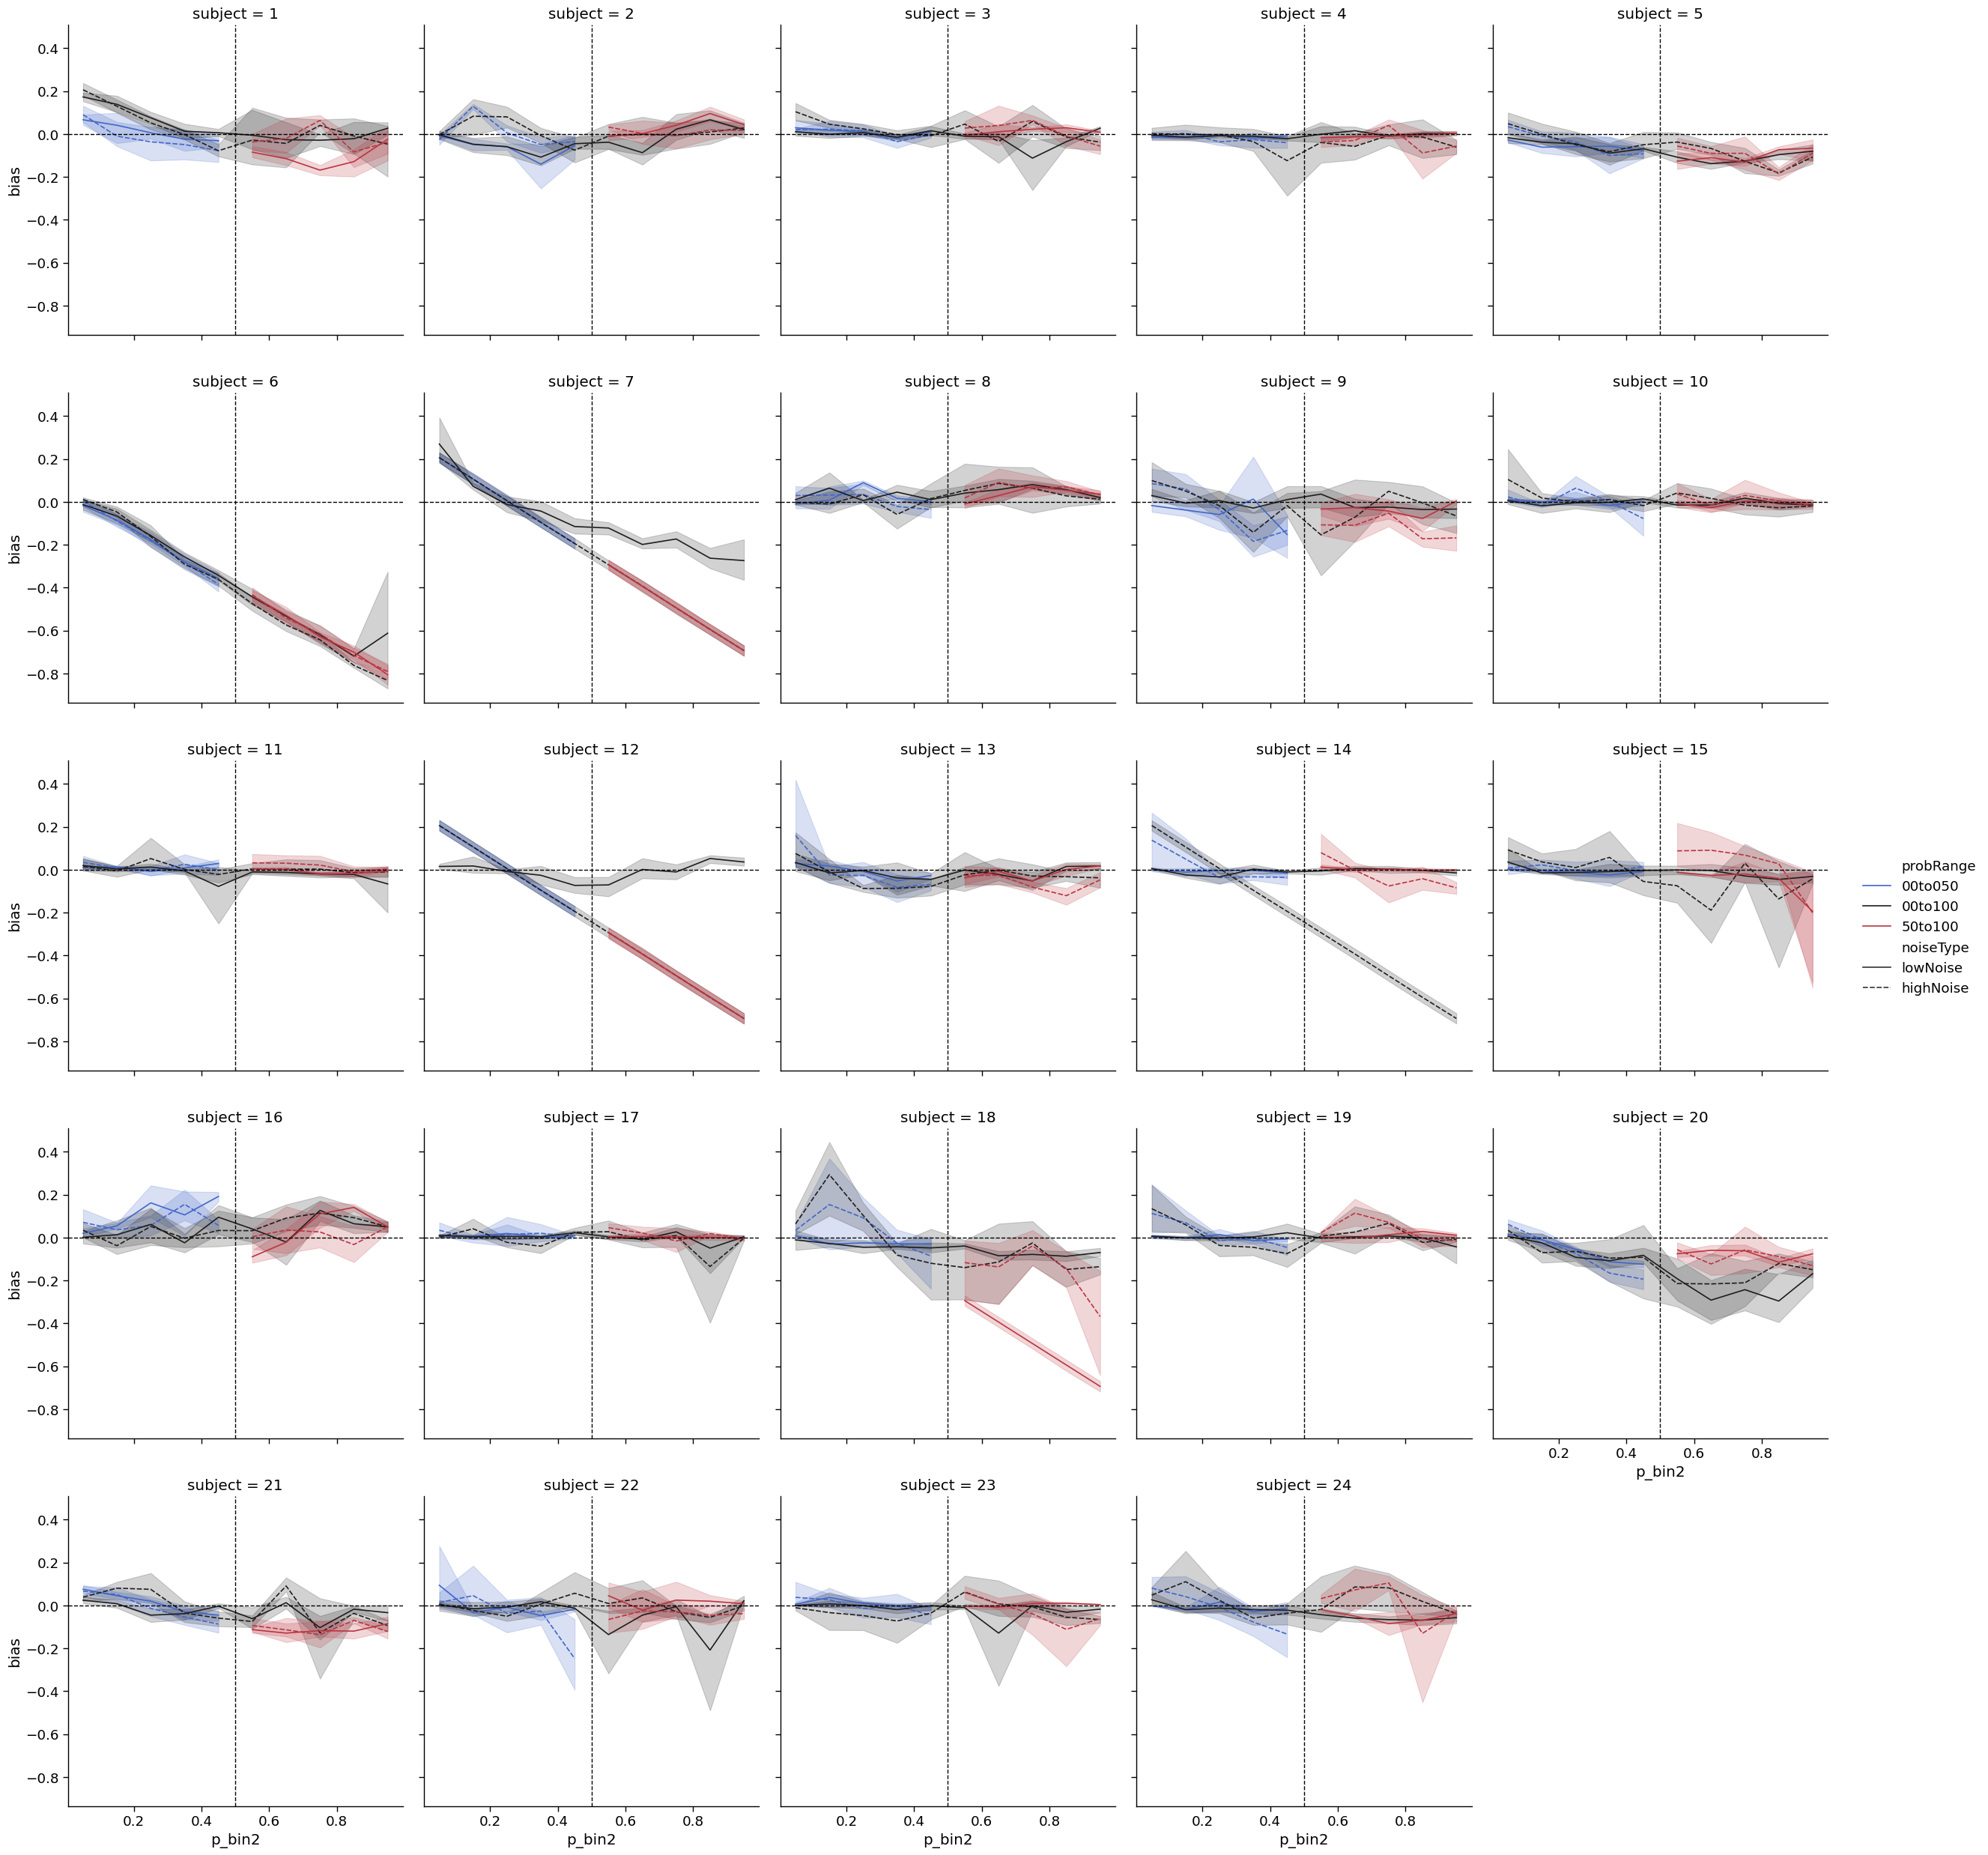

In [5]:
palette = sns.color_palette('icefire', 3)

g = sns.relplot(df.reset_index(), col='subject', hue='probRange', style='noiseType', col_wrap=5,
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin2', y='bias', kind='line')

g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))


In [6]:
df

probRange outputRange  noiseType  \
subject runNumber trialNumber                                    
3       1         1             00to100     00to100   lowNoise   
                  2             00to100     00to100   lowNoise   
                  3             00to100     00to100   lowNoise   
                  4             00to100     00to100   lowNoise   
                  5             00to100     00to100   lowNoise   
...                                 ...         ...        ...   
22      6         21            00to050     00to100  highNoise   
                  22            00to050     00to100  highNoise   
                  23            00to050     00to100  highNoise   
                  24            00to050     00to100  highNoise   
                  25            00to050     00to100  highNoise   

                               trialStartTime  presentedProb_1  \
subject runNumber trialNumber                                    
3       1         1                  0.156715               35   
                  2                 11.674922                5   
                  3                 23.072724               89   
                  4                 34.563811               59   
                  5                 46.056960               69   
...                                       ...              ...   
22      6         21               230.043129             1175   
                  22               241.550938             3072   
                  23               253.047445              154   
                  24               264.552890             1165   
                  25               276.058965              849   

                               presentedProb_2  certaintyEquivalent  \
subject runNumber trialNumber                                         
3       1         1                        100                 14.0   
                  2                        100                  3.0   
                  3                        100                 35.0   
                  4                        100                 24.0   
                  5                        100                 29.0   
...                                        ...                  ...   
22      6         21                      3016                 12.0   
                  22                      9295                 10.0   
                  23                      3195                  2.0   
                  24                      2596                  9.0   
                  25                      7755                  4.0   

                               responseTime invalidResponses answer  ...  \
subject runNumber trialNumber                                        ...   
3       1         1               11.000001              NaN    yes  ...   
                  2               11.000001              NaN    yes  ...   
                  3               11.000002              NaN    yes  ...   
                  4               11.000001              NaN    yes  ...   
                  5               11.000001              NaN    yes  ...   
...                                     ...              ...    ...  ...   
22      6         21              11.000001              NaN    yes  ...   
                  22              11.000001              NaN    yes  ...   
                  23              11.000001              NaN    yes  ...   
                  24              11.000001              NaN    yes  ...   
                  25              11.000001              NaN    yes  ...   

                              lotteryEndTimings scaleStartTimings  \
subject runNumber trialNumber                                       
3       1         1                        11.5               0.5   
                  2                        23.0              12.0   
                  3                        34.5              23.5   
                  4                        46.0       

In [7]:
df.groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean()

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/2579777784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean()


certaintyEquivalent      bias
subject p_bin2             probRange noiseType                               
1       0.05               00to050   highNoise                  6.0  0.089886
                                     lowNoise                   5.0  0.066279
                           00to100   highNoise                 11.0  0.206165
                                     lowNoise                  10.0  0.172558
                           50to100   highNoise                  NaN       NaN
...                                                             ...       ...
24      0.9500000000000002 00to050   lowNoise                   NaN       NaN
                           00to100   highNoise                 39.2 -0.038003
                                     lowNoise                  38.4 -0.056977
                           50to100   highNoise                 39.6 -0.028700
                                     lowNoise                  39.2 -0.038372

[1440 rows x 2 columns]

# Without problematic subjects

In [8]:
problematic_subjects = [6,7,12,14,18]

filtered_df = df.drop(problematic_subjects, level='subject')

In [9]:
palette = sns.color_palette('icefire', 3)

g = sns.relplot(filtered_df.groupby(['subject', 'p_bin', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType', 
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin', y='bias', kind='line',
            errorbar='se')

g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1403013770.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sns.relplot(filtered_df.groupby(['subject', 'p_bin', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType',


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/3035361002.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g2 = sns.relplot(


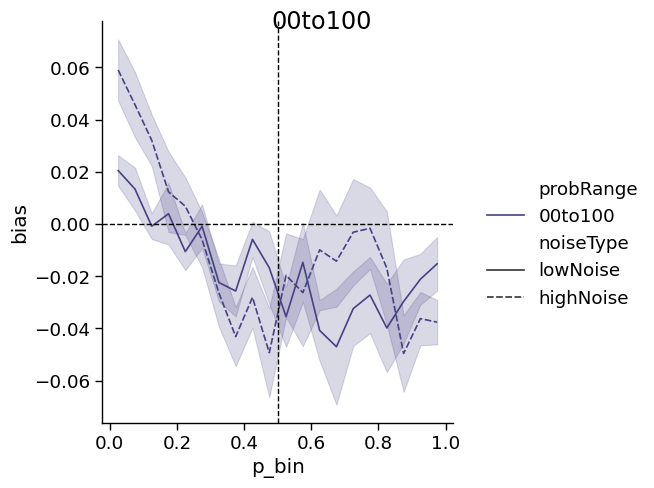

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'problematic_subjects' is defined

# Filter data for 00to050 and 50to100
filtered_data_00to050_50to100 = df[
    (df['probRange'].isin(['00to050', '50to100'])) & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Filter data for 00to100
filtered_data_00to100 = df[
    (df['probRange'] == '00to100') & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Define color palette
palette = sns.color_palette('icefire', 2)

# Create separate line plots
g1 = sns.relplot(
    data=filtered_data_00to050_50to100,
    hue='probRange',
    style='noiseType',
    hue_order=['00to050', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g1.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g1.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g1.fig.suptitle('00to050 and 50to100')

g2 = sns.relplot(
    data=filtered_data_00to100,
    hue='probRange',
    style='noiseType',
    hue_order=['00to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g2.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g2.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g2.fig.suptitle('00to100')

plt.show()


# Statistical tests

# High noise

/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/2425523569.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ip

P-value for 00to050 vs 00to100: 0.19593384094069533
P-value for 50to100 vs 00to100: 0.16877213869380323
Mean Bias Difference for 00to050 vs 00to100: -0.01348726050209946
Mean Bias Difference for 50to100 vs 00to100: 0.013180391523154871


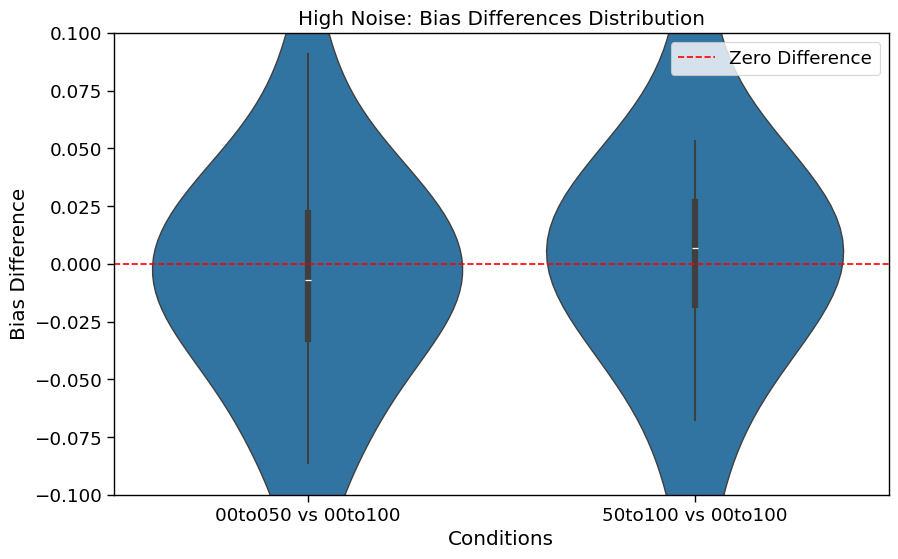

In [11]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant data for highNoise condition
high_noise_df = filtered_df[filtered_df['noiseType'] == 'highNoise']

bin_size = 0.2

# Specify the probRange conditions for comparison
conditions_to_compare = [('00to050', '00to100', 0.5-bin_size, 0.5), ('50to100', '00to100', 0.5, 0.5+bin_size)]

# Create empty lists to store average bias for each condition
average_bias_00to050 = []
average_bias_00to100 = []
average_bias_50to100 = []
bias_differences = []

# Iterate over subjects
for subject_id, subject_data in high_noise_df.groupby('subject'):

    # Perform paired t-tests for specified conditions and p-value bins
    for condition_pair in conditions_to_compare:
        condition_1, condition_2, p_bin_start, p_bin_end = condition_pair

        # Filter NaN values
        subset_1 = subject_data[(subject_data['probRange'] == condition_1)]
        subset_2 = subject_data[(subject_data['probRange'] == condition_2)]

        # Filter rows within the specified p-value bin
        subset_1 = subset_1[(subset_1['p'] >= p_bin_start) & (subset_1['p'] < p_bin_end)]
        subset_2 = subset_2[(subset_2['p'] >= p_bin_start) & (subset_2['p'] < p_bin_end)]

        # Check if there are enough non-NaN values for the t-test
        if len(subset_1) >= 2 and len(subset_2) >= 2:

            # Append average bias for each condition
            if condition_1 == '00to050':
                average_bias_00to050.append(subset_1['bias'].mean())
            elif condition_1 == '50to100':
                average_bias_50to100.append(subset_1['bias'].mean())

            if condition_2 == '00to100':
                average_bias_00to100.append(subset_2['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = subset_1['bias'].mean() - subset_2['bias'].mean()
            bias_differences.append({
                'Subject': subject_id,
                'Condition': f'{condition_1} vs {condition_2}',
                'Bias Difference': bias_difference
            })

# Perform a within-subjects t-test
t_test_result_00to050_00to100 = pg.ttest(average_bias_00to050, average_bias_00to100, paired=True)
t_test_result_50to100_00to100 = pg.ttest(average_bias_50to100, average_bias_00to100, paired=True)

print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
print(f"P-value for 50to100 vs 00to100: {t_test_result_50to100_00to100['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_df = pd.DataFrame(bias_differences)
# Calculate the mean of the bias differences for each condition
mean_bias_difference_00to050 = bias_differences_df[bias_differences_df['Condition'] == '00to050 vs 00to100']['Bias Difference'].mean()
mean_bias_difference_50to100 = bias_differences_df[bias_differences_df['Condition'] == '50to100 vs 00to100']['Bias Difference'].mean()

print(f"Mean Bias Difference for 00to050 vs 00to100: {mean_bias_difference_00to050}")
print(f"Mean Bias Difference for 50to100 vs 00to100: {mean_bias_difference_50to100}")
# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Bias Difference', data=bias_differences_df)
plt.title('High Noise: Bias Differences Distribution')
plt.xlabel('Conditions')
plt.ylabel('Bias Difference')
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.legend()
plt.show()


# Low noise

/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/51568542.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipyk

P-value for 00to050 vs 00to100: 0.7214061492281274
P-value for 50to100 vs 00to100: 0.704571397304935
Mean Bias Difference for 00to050 vs 00to100: -0.003997620019039846
Mean Bias Difference for 50to100 vs 00to100: 0.004507003943968447


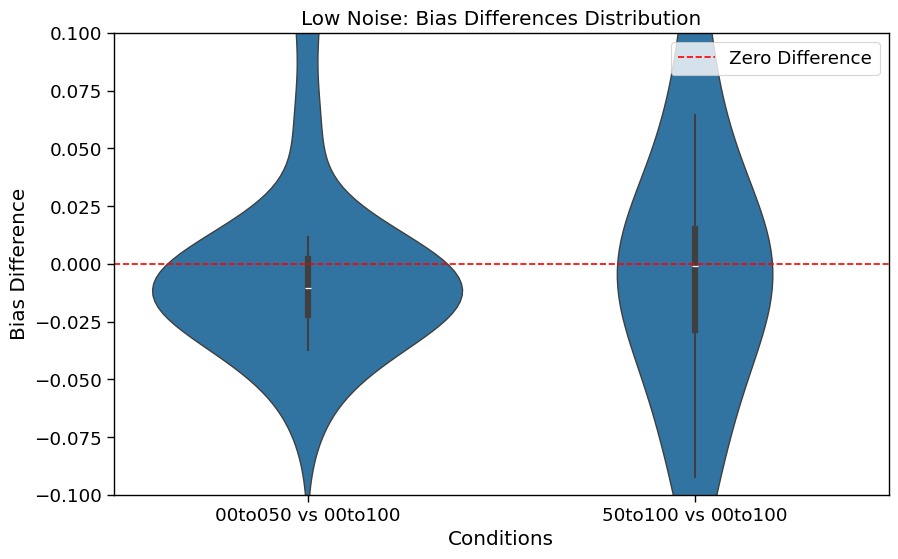

In [12]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant data for highNoise condition
high_noise_df = filtered_df[filtered_df['noiseType'] == 'lowNoise']

# Specify the probRange conditions for comparison
conditions_to_compare = [('00to050', '00to100', 0.5-bin_size, 0.5), ('50to100', '00to100', 0.5, 0.5+bin_size)]

# Create empty lists to store average bias for each condition
average_bias_00to050 = []
average_bias_00to100 = []
average_bias_50to100 = []
bias_differences = []

# Iterate over subjects
for subject_id, subject_data in high_noise_df.groupby('subject'):

    # Perform paired t-tests for specified conditions and p-value bins
    for condition_pair in conditions_to_compare:
        condition_1, condition_2, p_bin_start, p_bin_end = condition_pair

        # Filter NaN values
        subset_1 = subject_data[(subject_data['probRange'] == condition_1)]
        subset_2 = subject_data[(subject_data['probRange'] == condition_2)]

        # Filter rows within the specified p-value bin
        subset_1 = subset_1[(subset_1['p'] >= p_bin_start) & (subset_1['p'] < p_bin_end)]
        subset_2 = subset_2[(subset_2['p'] >= p_bin_start) & (subset_2['p'] < p_bin_end)]

        # Check if there are enough non-NaN values for the t-test
        if len(subset_1) >= 2 and len(subset_2) >= 2:
            t_test_result = pg.ttest(subset_1['bias'], subset_2['bias'], paired=True)

            # Append average bias for each condition
            if condition_1 == '00to050':
                average_bias_00to050.append(subset_1['bias'].mean())
            elif condition_1 == '50to100':
                average_bias_50to100.append(subset_1['bias'].mean())

            if condition_2 == '00to100':
                average_bias_00to100.append(subset_2['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = subset_1['bias'].mean() - subset_2['bias'].mean()
            bias_differences.append({
                'Subject': subject_id,
                'Condition': f'{condition_1} vs {condition_2}',
                'Bias Difference': bias_difference
            })

# Perform a within-subjects t-test
t_test_result_00to050_00to100 = pg.ttest(average_bias_00to050, average_bias_00to100, paired=True)
t_test_result_50to100_00to100 = pg.ttest(average_bias_50to100, average_bias_00to100, paired=True)

print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
print(f"P-value for 50to100 vs 00to100: {t_test_result_50to100_00to100['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_df = pd.DataFrame(bias_differences)
# Calculate the mean of the bias differences for each condition
mean_bias_difference_00to050 = bias_differences_df[bias_differences_df['Condition'] == '00to050 vs 00to100']['Bias Difference'].mean()
mean_bias_difference_50to100 = bias_differences_df[bias_differences_df['Condition'] == '50to100 vs 00to100']['Bias Difference'].mean()

print(f"Mean Bias Difference for 00to050 vs 00to100: {mean_bias_difference_00to050}")
print(f"Mean Bias Difference for 50to100 vs 00to100: {mean_bias_difference_50to100}")
# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Bias Difference', data=bias_differences_df)
plt.title('Low Noise: Bias Differences Distribution')
plt.xlabel('Conditions')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.legend()
plt.show()


# Noise condition

# Around 0.5

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/2614624653.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Range Condition', y='Noise Difference', data=bias_differences_noise_df, palette=palette)
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/2614624653.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = t_test_results_noise[range_cond]['p-val'][0]


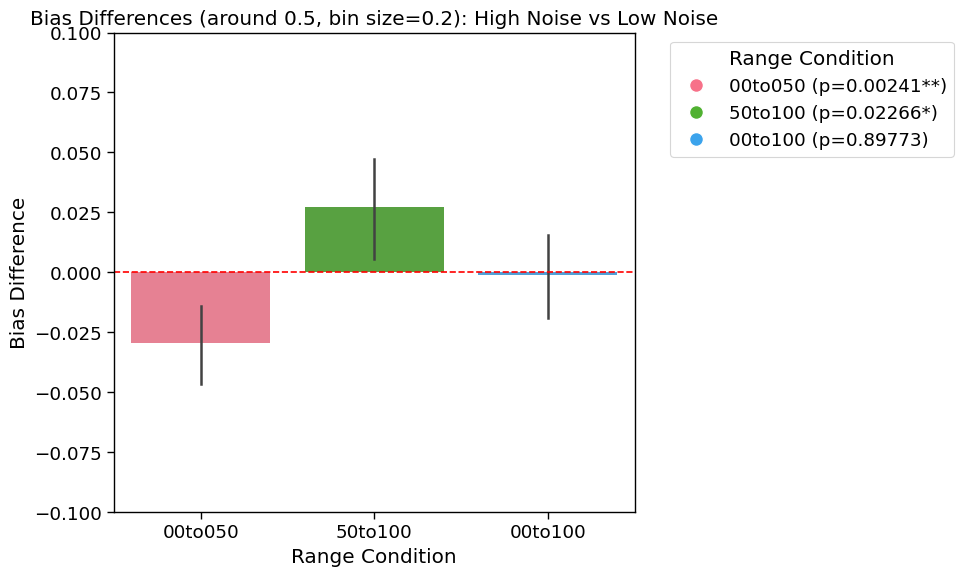

In [13]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Assuming you have 'filtered_df' defined and loaded with your data

bin_size = 0.2

# Specify the range conditions
range_conditions = ['00to050', '50to100', '00to100']

# Create empty lists to store average bias for each condition
average_bias_high_noise = {range_cond: [] for range_cond in range_conditions}
average_bias_low_noise = {range_cond: [] for range_cond in range_conditions}
bias_differences_noise = []

# Iterate over range conditions
for range_condition in range_conditions:
    # Iterate over subjects
    for subject_id, subject_data in filtered_df.groupby('subject'):
        # Filter data for the current range condition
        range_data = subject_data[subject_data['probRange'] == range_condition]

        # Filter NaN values
        high_noise_data = range_data[range_data['noiseType'] == 'highNoise']
        low_noise_data = range_data[range_data['noiseType'] == 'lowNoise']

        # Filter rows within the specified p-value bin
        high_noise_data = high_noise_data[(high_noise_data['p'] >= 0.5 - bin_size) & (high_noise_data['p'] < 0.5 + bin_size)]
        low_noise_data = low_noise_data[(low_noise_data['p'] >= 0.5 - bin_size) & (low_noise_data['p'] < 0.5 + bin_size)]

        # Check if there are enough non-NaN values for the t-test
        if len(high_noise_data) >= 2 and len(low_noise_data) >= 2:
            t_test_result = pg.ttest(high_noise_data['bias'], low_noise_data['bias'], paired=True)

            # Append average bias for each condition and noise type
            average_bias_high_noise[range_condition].append(high_noise_data['bias'].mean())
            average_bias_low_noise[range_condition].append(low_noise_data['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = high_noise_data['bias'].mean() - low_noise_data['bias'].mean()
            bias_differences_noise.append({
                'Subject': subject_id,
                'Range Condition': range_condition,
                'Noise Difference': bias_difference
            })

# Perform a within-subjects t-test for each range condition
t_test_results_noise = {range_cond: pg.ttest(average_bias_high_noise[range_cond], average_bias_low_noise[range_cond], paired=True) for range_cond in range_conditions}

# Convert the list of dictionaries to a DataFrame for the bar plot
bias_differences_noise_df = pd.DataFrame(bias_differences_noise)

# Plotting with different colors for each condition
palette = sns.color_palette("husl", len(range_conditions))
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Range Condition', y='Noise Difference', data=bias_differences_noise_df, palette=palette)

# Display p-values in the legend with matching colors and stars
legend_handles = []
legend_labels = []
for i, range_cond in enumerate(range_conditions):
    p_value = t_test_results_noise[range_cond]['p-val'][0]
    significance = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''
    
    handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10)
    legend_handles.append(handle)
    label = f'{range_cond} (p={p_value:.5f}{significance})'
    legend_labels.append(label)

# Move the legend outside the figure
ax.legend(title="Range Condition", handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Bias Differences (around 0.5, bin size='+str(bin_size)+'): High Noise vs Low Noise')
plt.xlabel('Range Condition')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()  # Ensures the layout is adjusted to fit the legend outside the figure
plt.show()


# Above 0.1

P-value for 00to050 in High Noise vs Low Noise: 0.0015400964498824108
P-value for 00to100 in High Noise vs Low Noise: 0.004501654444652605


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1993654143.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")


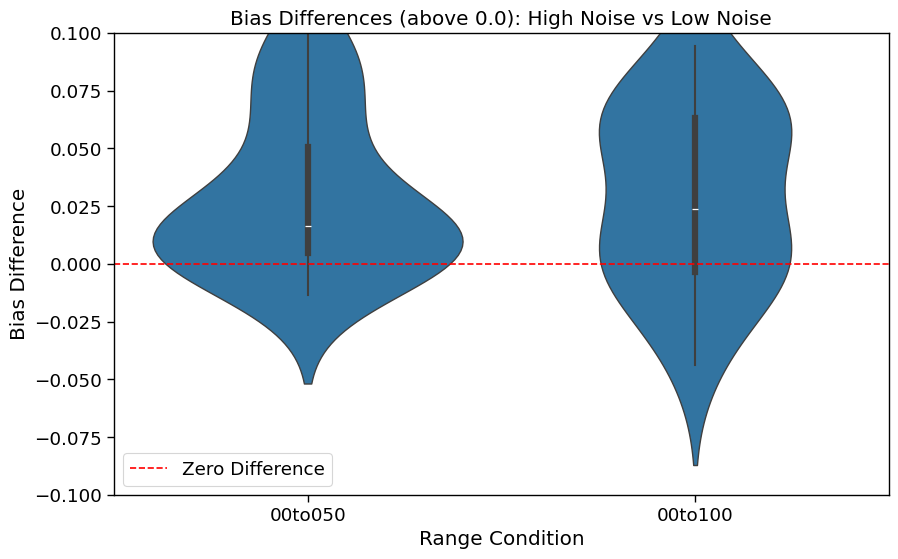

In [14]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the range conditions
range_conditions = ['00to050', '00to100']

# Create empty lists to store average bias for each condition
average_bias_high_noise = {range_cond: [] for range_cond in range_conditions}
average_bias_low_noise = {range_cond: [] for range_cond in range_conditions}
bias_differences_noise = []

# Iterate over range conditions
for range_condition in range_conditions:
    # Iterate over subjects
    for subject_id, subject_data in filtered_df.groupby('subject'):

        # Filter data for the current range condition
        range_data = subject_data[subject_data['probRange'] == range_condition]

        # Filter NaN values
        high_noise_data = range_data[range_data['noiseType'] == 'highNoise']
        low_noise_data = range_data[range_data['noiseType'] == 'lowNoise']

        # Filter rows within the specified p-value bin
        high_noise_data = high_noise_data[(high_noise_data['p'] >= 0.0 - bin_size) & (high_noise_data['p'] < 0.0 + bin_size)]
        low_noise_data = low_noise_data[(low_noise_data['p'] >= 0.0 - bin_size) & (low_noise_data['p'] < 0.0 + bin_size)]

        # Check if there are enough non-NaN values for the t-test
        if len(high_noise_data) >= 2 and len(low_noise_data) >= 2:
            t_test_result = pg.ttest(high_noise_data['bias'], low_noise_data['bias'], paired=True)

            # Append average bias for each condition and noise type
            average_bias_high_noise[range_condition].append(high_noise_data['bias'].mean())
            average_bias_low_noise[range_condition].append(low_noise_data['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = high_noise_data['bias'].mean() - low_noise_data['bias'].mean()
            bias_differences_noise.append({
                'Subject': subject_id,
                'Range Condition': range_condition,
                'Noise Difference': bias_difference
            })

# Perform a within-subjects t-test for each range condition
t_test_results_noise = {range_cond: pg.ttest(average_bias_high_noise[range_cond], average_bias_low_noise[range_cond], paired=True) for range_cond in range_conditions}

# Print t-test results
for range_cond in range_conditions:
    print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_noise_df = pd.DataFrame(bias_differences_noise)

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Range Condition', y='Noise Difference', data=bias_differences_noise_df)
plt.title('Bias Differences (above 0.0): High Noise vs Low Noise')
plt.xlabel('Range Condition')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.legend()
plt.show()


# Below 1.0

P-value for 50to100 in High Noise vs Low Noise: 0.002566396310201605
P-value for 00to100 in High Noise vs Low Noise: 0.3818991235066953


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/3795066290.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")


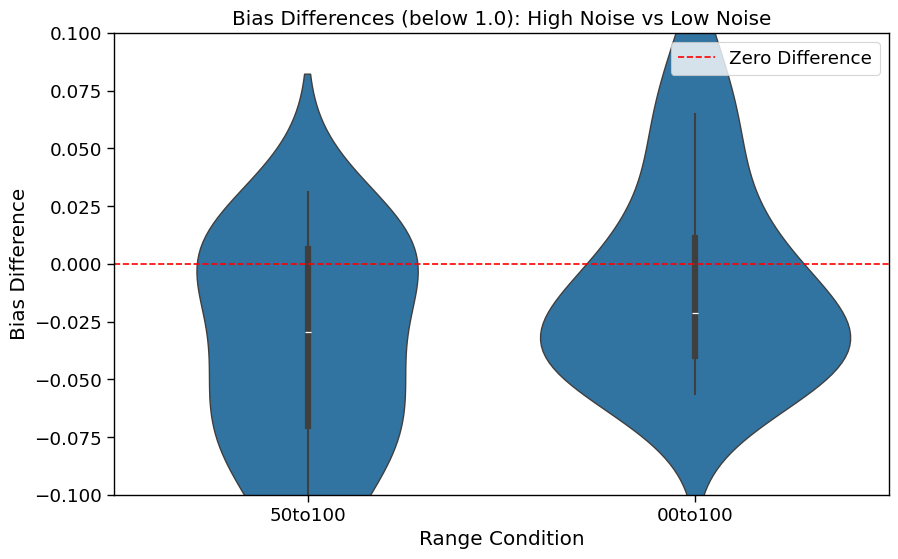

In [15]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the range conditions
range_conditions = ['50to100', '00to100']

# Create empty lists to store average bias for each condition
average_bias_high_noise = {range_cond: [] for range_cond in range_conditions}
average_bias_low_noise = {range_cond: [] for range_cond in range_conditions}
bias_differences_noise = []

# Iterate over range conditions
for range_condition in range_conditions:
    # Iterate over subjects
    for subject_id, subject_data in filtered_df.groupby('subject'):

        # Filter data for the current range condition
        range_data = subject_data[subject_data['probRange'] == range_condition]

        # Filter NaN values
        high_noise_data = range_data[range_data['noiseType'] == 'highNoise']
        low_noise_data = range_data[range_data['noiseType'] == 'lowNoise']

        # Filter rows within the specified p-value bin
        high_noise_data = high_noise_data[(high_noise_data['p'] >= 1.0 - bin_size) & (high_noise_data['p'] < 1.0 + bin_size)]
        low_noise_data = low_noise_data[(low_noise_data['p'] >= 1.0 - bin_size) & (low_noise_data['p'] < 1.0 + bin_size)]

        # Check if there are enough non-NaN values for the t-test
        if len(high_noise_data) >= 2 and len(low_noise_data) >= 2:
            t_test_result = pg.ttest(high_noise_data['bias'], low_noise_data['bias'], paired=True)

            # Append average bias for each condition and noise type
            average_bias_high_noise[range_condition].append(high_noise_data['bias'].mean())
            average_bias_low_noise[range_condition].append(low_noise_data['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = high_noise_data['bias'].mean() - low_noise_data['bias'].mean()
            bias_differences_noise.append({
                'Subject': subject_id,
                'Range Condition': range_condition,
                'Noise Difference': bias_difference
            })

# Perform a within-subjects t-test for each range condition
t_test_results_noise = {range_cond: pg.ttest(average_bias_high_noise[range_cond], average_bias_low_noise[range_cond], paired=True) for range_cond in range_conditions}

# Print t-test results
for range_cond in range_conditions:
    print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_noise_df = pd.DataFrame(bias_differences_noise)

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Range Condition', y='Noise Difference', data=bias_differences_noise_df)
plt.title('Bias Differences (below 1.0): High Noise vs Low Noise')
plt.xlabel('Range Condition')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.legend()
plt.show()


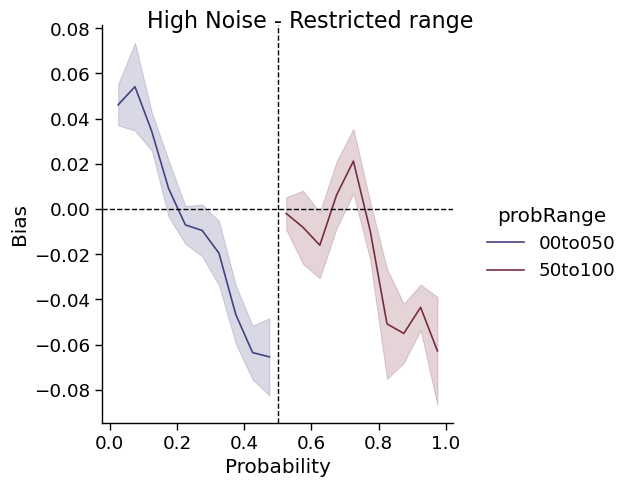

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Increase font size for better visibility in plots
sns.set_context("paper", font_scale=1.5)

# Filter data for 00to050 and 50to100 in high noise condition
filtered_data_high_noise_00to050_50to100 = df[
    (df['probRange'].isin(['00to050', '50to100'])) & 
    (df['noiseType'] == 'highNoise') & 
    ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Filter data for 00to100 in high noise condition
filtered_data_high_noise_00to100 = df[
    (df['probRange'] == '00to100') & 
    (df['noiseType'] == 'highNoise') & 
    ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Define color palette
palette = sns.color_palette('icefire', 2)

# Create separate line plots for high noise condition
g1_high = sns.relplot(
    data=filtered_data_high_noise_00to050_50to100,
    hue='probRange',
    hue_order=['00to050', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g1_high.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g1_high.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g1_high.set_axis_labels(x_var="Probability", y_var="Bias")  # Set axis labels
g1_high.fig.suptitle('High Noise - Restricted range', fontsize=16)  # Adjust font size

# Create separate line plots for high noise condition
g2_high = sns.relplot(
    data=filtered_data_high_noise_00to100,
    hue='probRange',
    hue_order=['00to100'],
    palette=['black'],  # Set color for '00to100' to black
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g2_high.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g2_high.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g2_high.set_axis_labels(x_var="Probability", y_var="Bias")  # Set axis labels
g2_high.fig.suptitle('High Noise - Full Range', fontsize=16)  # Adjust font size

plt.show()


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter data for 00to050 and 50to100
filtered_data_00to050_50to100 = df[
    (df['probRange'].isin(['00to050', '50to100'])) & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Filter data for 00to100
filtered_data_00to100 = df[
    (df['probRange'] == '00to100') & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Separate rows based on 'noiseType'
low_noise_00to050_50to100 = filtered_data_00to050_50to100[filtered_data_00to050_50to100['noiseType'] == 'lowNoise']
high_noise_00to050_50to100 = filtered_data_00to050_50to100[filtered_data_00to050_50to100['noiseType'] == 'highNoise']

low_noise_00to100 = filtered_data_00to100[filtered_data_00to100['noiseType'] == 'lowNoise']
high_noise_00to100 = filtered_data_00to100[filtered_data_00to100['noiseType'] == 'highNoise']

# Define color palette
palette = sns.color_palette('icefire', 3)

# Create separate line plots for low noise
g1_low = sns.relplot(
    data=pd.concat([low_noise_00to050_50to100, low_noise_00to100]),
    hue='probRange',
    hue_order=['00to050', '00to100', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g1_low.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g1_low.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g1_low.fig.suptitle('Low Noise Condition')

# Create separate line plots for high noise
g2_high = sns.relplot(
    data=pd.concat([high_noise_00to050_50to100, high_noise_00to100]),
    hue='probRange',
    hue_order=['00to050', '00to100', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g2_high.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g2_high.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g2_high.fig.suptitle('High Noise Condition')

plt.show()


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/3947338309.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sns.relplot(df.drop(problematic_subjects, level='subject').groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType',


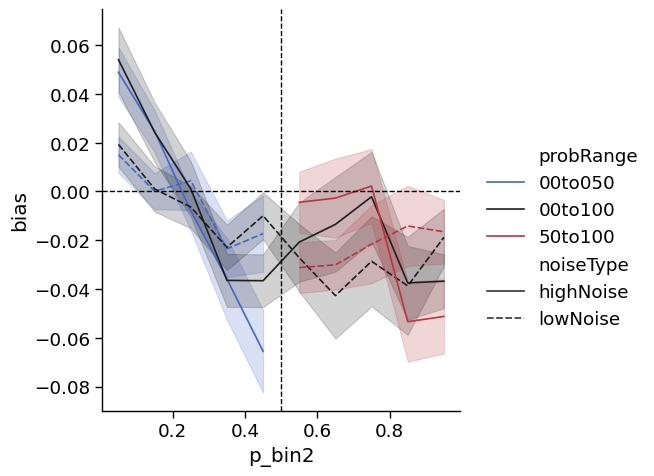

In [18]:
palette = sns.color_palette('icefire', 3)

g = sns.relplot(df.drop(problematic_subjects, level='subject').groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType', 
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin2', y='bias', kind='line',
            errorbar='se')

g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp = df.drop(problematic_subjects, level='subject').groupby(['subject', 'probRange', 'noiseType', 'p', 'p_bin', 'p_bin2', 'p_bin3'])[['bias']].mean()

tmp = tmp.unstack('probRange')['bias']

tmp['diff_00to050'] = tmp['00to050'] - tmp['00to100']
tmp['diff_50to100'] = tmp['50to100'] - tmp['00to100']

tmp = tmp[['diff_00to050', 'diff_50to100']].stack().to_frame('difference_vs_full_range')

# Create separate plots for lowNoise and highNoise conditions
g_low = sns.relplot(data=tmp.reset_index()[tmp.reset_index()['noiseType'] == 'lowNoise'],
                    hue='probRange', style='noiseType', x='p_bin2', y='difference_vs_full_range',
                    kind='line', palette=sns.color_palette('icefire', 2))
g_low.ax.axhline(0.0, c='k', ls='--')  # Add a horizontal line at y=0
g_low.fig.suptitle('Narrow ranges - full range (Low Noise)', y=1.02)  # Adjust the vertical position of the title
g_low.set(xlabel='p bin', ylabel='Bias Difference')
g_low.set(ylim=(-0.06, 0.06))  # Set y-axis limits

g_high = sns.relplot(data=tmp.reset_index()[tmp.reset_index()['noiseType'] == 'highNoise'],
                     hue='probRange', style='noiseType', x='p_bin2', y='difference_vs_full_range',
                     kind='line', palette=sns.color_palette('icefire', 2))
g_high.ax.axhline(0.0, c='k', ls='--')  # Add a horizontal line at y=0
g_high.fig.suptitle('Narrow ranges - full range (High Noise)', y=1.02)  # Adjust the vertical position of the title
g_high.set(xlabel='p bin', ylabel='Bias Difference')
g_high.set(ylim=(-0.06, 0.06))  # Set y-axis limits

plt.show()


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/3019487268.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.drop(problematic_subjects, level='subject').groupby(['subject', 'probRange', 'noiseType', 'p', 'p_bin', 'p_bin2', 'p_bin3'])[['bias']].mean()


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1943904411.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.drop(problematic_subjects, level='subject').groupby(['subject', 'probRange', 'noiseType', 'p', 'p_bin', 'p_bin2', 'p_bin3'])[['bias']].mean()


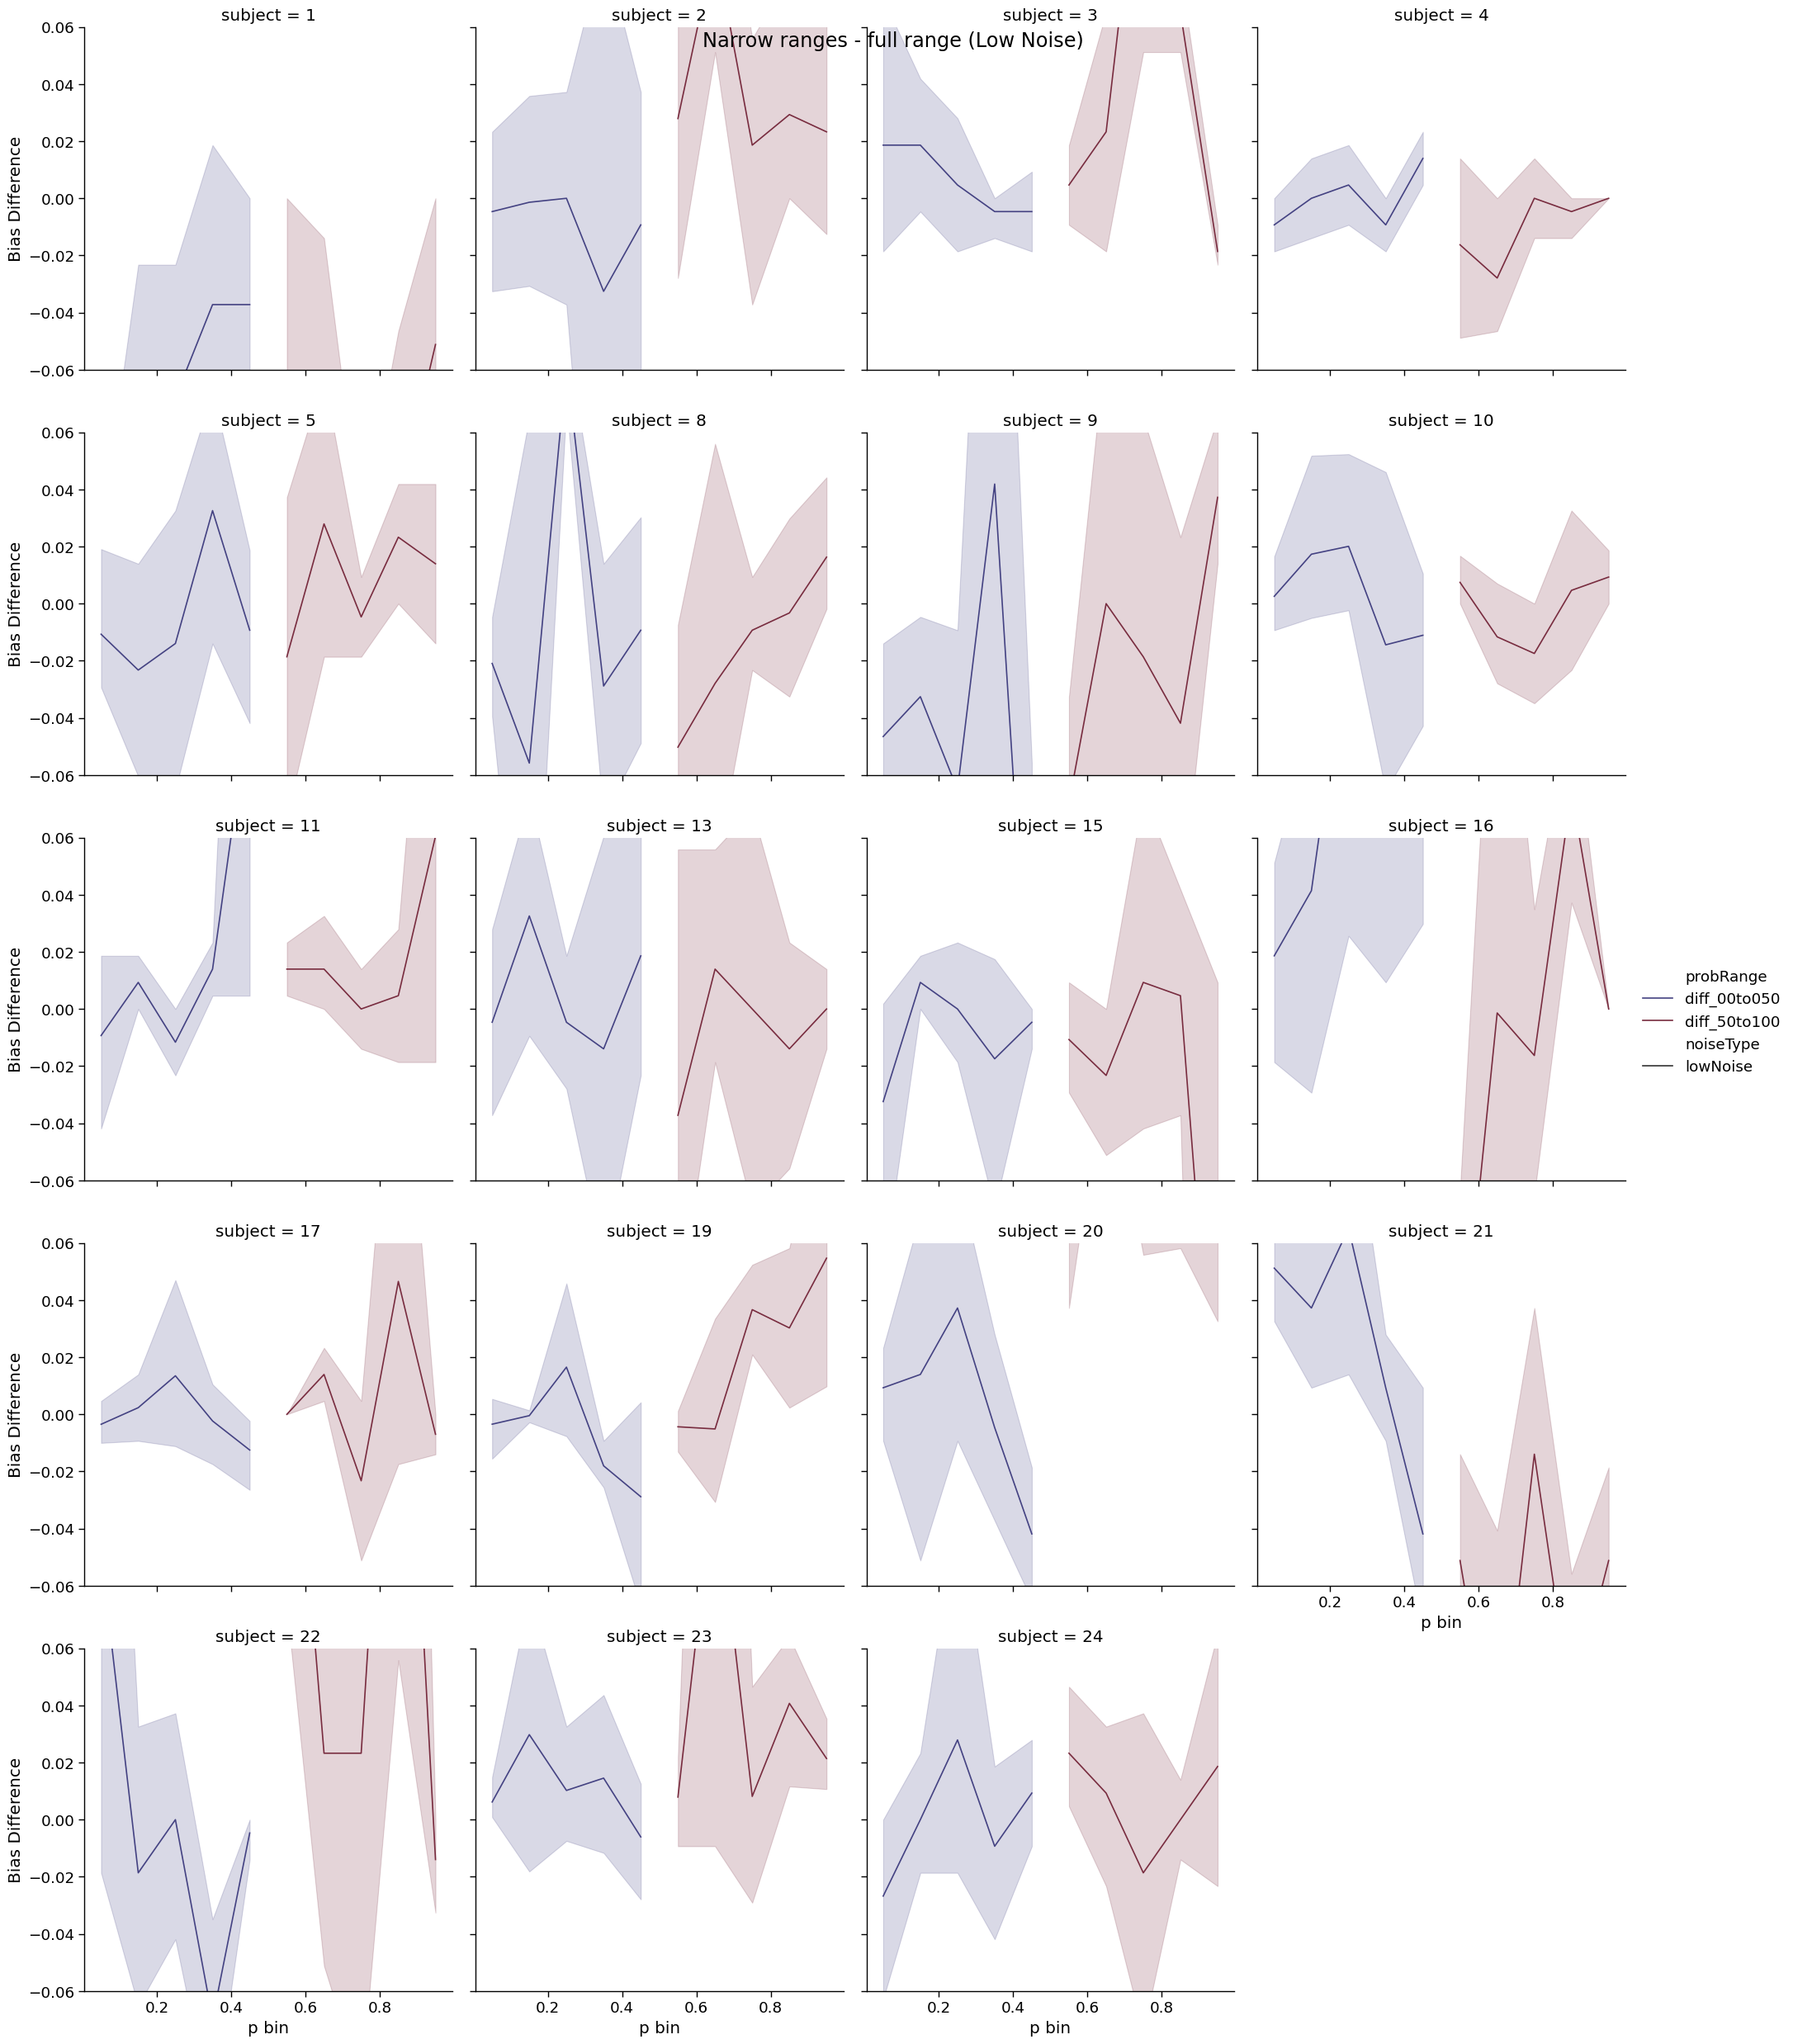

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'subject' is a level in the MultiIndex
tmp = df.drop(problematic_subjects, level='subject').groupby(['subject', 'probRange', 'noiseType', 'p', 'p_bin', 'p_bin2', 'p_bin3'])[['bias']].mean()

tmp = tmp.unstack('probRange')['bias']

tmp['diff_00to050'] = tmp['00to050'] - tmp['00to100']
tmp['diff_50to100'] = tmp['50to100'] - tmp['00to100']

tmp = tmp[['diff_00to050', 'diff_50to100']].stack().to_frame('difference_vs_full_range')

# Create separate plots for lowNoise and highNoise conditions for each subject
g_low = sns.relplot(data=tmp.reset_index()[tmp.reset_index()['noiseType'] == 'lowNoise'],
                    hue='probRange', style='noiseType', col='subject', col_wrap=4,
                    x='p_bin2', y='difference_vs_full_range', kind='line', palette=sns.color_palette('icefire', 2))
g_low.set_axis_labels(x_var='p bin', y_var='Bias Difference')
g_low.fig.suptitle('Narrow ranges - full range (Low Noise)')
g_low.set(ylim=(-0.06, 0.06))  # Set y-axis limits

g_high = sns.relplot(data=tmp.reset_index()[tmp.reset_index()['noiseType'] == 'highNoise'],
                     hue='probRange', style='noiseType', col='subject', col_wrap=4,
                     x='p_bin2', y='difference_vs_full_range', kind='line', palette=sns.color_palette('icefire', 2))
g_high.set_axis_labels(x_var='p bin', y_var='Bias Difference')
g_high.fig.suptitle('Narrow ranges - full range (High Noise)')
g_high.set(ylim=(-0.06, 0.06))  # Set y-axis limits

plt.show()


In [21]:
tmp

difference_vs_full_range
subject noiseType p        p_bin               p_bin2             p_bin3             probRange                             
1       highNoise 0.009901 0.025               0.05               0.1                diff_00to050                 -0.116279
                  0.030731 0.025               0.05               0.1                diff_00to050                 -0.116279
                  0.048200 0.025               0.05               0.1                diff_00to050                 -0.116279
                  0.070375 0.07500000000000001 0.05               0.1                diff_00to050                  0.000000
                  0.089035 0.07500000000000001 0.05               0.1                diff_00to050                 -0.232558
...                                                                                                                     ...
24      lowNoise  0.910000 0.9250000000000002  0.9500000000000002 0.9999999999999999 diff_50to100                  0.093023
                  0.930000 0.9250000000000002  0.9500000000000002 0.9999999999999999 diff_50to100                 -0.046512
                  0.950000 0.9250000000000002  0.9500000000000002 0.9999999999999999 diff_50to100                  0.069767
                  0.970000 0.9750000000000002  0.9500000000000002 0.9999999999999999 diff_50to100                  0.000000
                  0.990000 0.9750000000000002  0.9500000000000002 0.9999999999999999 diff_50to100                 -0.023256

[1851 rows x 1 columns]

In [22]:
df

probRange outputRange  noiseType  \
subject runNumber trialNumber                                    
3       1         1             00to100     00to100   lowNoise   
                  2             00to100     00to100   lowNoise   
                  3             00to100     00to100   lowNoise   
                  4             00to100     00to100   lowNoise   
                  5             00to100     00to100   lowNoise   
...                                 ...         ...        ...   
22      6         21            00to050     00to100  highNoise   
                  22            00to050     00to100  highNoise   
                  23            00to050     00to100  highNoise   
                  24            00to050     00to100  highNoise   
                  25            00to050     00to100  highNoise   

                               trialStartTime  presentedProb_1  \
subject runNumber trialNumber                                    
3       1         1                  0.156715               35   
                  2                 11.674922                5   
                  3                 23.072724               89   
                  4                 34.563811               59   
                  5                 46.056960               69   
...                                       ...              ...   
22      6         21               230.043129             1175   
                  22               241.550938             3072   
                  23               253.047445              154   
                  24               264.552890             1165   
                  25               276.058965              849   

                               presentedProb_2  certaintyEquivalent  \
subject runNumber trialNumber                                         
3       1         1                        100                 14.0   
                  2                        100                  3.0   
                  3                        100                 35.0   
                  4                        100                 24.0   
                  5                        100                 29.0   
...                                        ...                  ...   
22      6         21                      3016                 12.0   
                  22                      9295                 10.0   
                  23                      3195                  2.0   
                  24                      2596                  9.0   
                  25                      7755                  4.0   

                               responseTime invalidResponses answer  ...  \
subject runNumber trialNumber                                        ...   
3       1         1               11.000001              NaN    yes  ...   
                  2               11.000001              NaN    yes  ...   
                  3               11.000002              NaN    yes  ...   
                  4               11.000001              NaN    yes  ...   
                  5               11.000001              NaN    yes  ...   
...                                     ...              ...    ...  ...   
22      6         21              11.000001              NaN    yes  ...   
                  22              11.000001              NaN    yes  ...   
                  23              11.000001              NaN    yes  ...   
                  24              11.000001              NaN    yes  ...   
                  25              11.000001              NaN    yes  ...   

                              lotteryEndTimings scaleStartTimings  \
subject runNumber trialNumber                                       
3       1         1                        11.5               0.5   
                  2                        23.0              12.0   
                  3                        34.5              23.5   
                  4                        46.0       

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the conditions
conditions = ["00to050", "00to100", "50to100"]
noise_types = ["highNoise", "lowNoise"]

# Specify the bin size for 'p'
bin_size = 0.1

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, 11)).apply(lambda x: x.mid).astype(float).round(3)

# Calculate the variation (variance) within each bin for each subject
binwise_var = filtered_df.groupby(['subject', 'noiseType', 'probRange', 'p_bin3'])['certaintyEquivalent'].var()
binwise_var = binwise_var.to_frame('var')

# Plotting
g = sns.relplot(x='p_bin3', y='var', hue='probRange', row='noiseType', data=binwise_var.reset_index(),
                kind='line', aspect=3., errorbar='se', facet_kws={'sharey': False}, markers=True)

# Adjust layout
g.fig.suptitle('CertaintyEquivalent Variation Across Bins')
plt.show()


In [24]:
filtered_df['p_bin3']

subject  runNumber  trialNumber
3        1          1              0.35
                    2              0.05
                    3              0.85
                    4              0.55
                    5              0.65
                                   ... 
22       6          21             0.35
                    22             0.35
                    23             0.05
                    24             0.45
                    25             0.15
Name: p_bin3, Length: 3800, dtype: float64

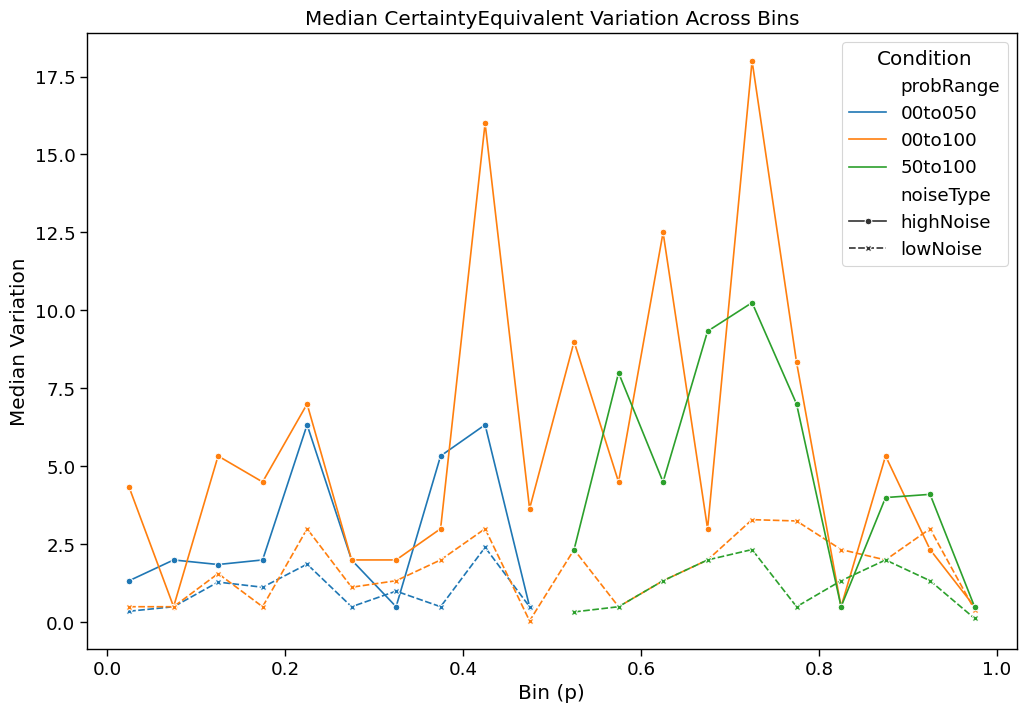

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the conditions
conditions = ["00to050", "00to100", "50to100"]
noise_types = ["highNoise", "lowNoise"]

# Specify the bin size for 'p'
bin_size = 0.05

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, 21)).apply(lambda x: x.mid).astype(float).round(3)

# Calculate the variation (variance) within each bin for each subject
binwise_var = filtered_df.groupby(['subject', 'noiseType', 'probRange', 'p_bin3'])['certaintyEquivalent'].var()
binwise_var = binwise_var.to_frame('var').reset_index()

# Plotting
plt.figure(figsize=(12, 8))
median_variation_per_bin = binwise_var.groupby(['p_bin3', 'probRange', 'noiseType'])['var'].median().reset_index()
sns.lineplot(data=median_variation_per_bin, x='p_bin3', y='var', hue='probRange', style='noiseType', markers=True)

# Adjust layout
plt.title('Median CertaintyEquivalent Variation Across Bins')
plt.xlabel('Bin (p)')
plt.ylabel('Median Variation')
plt.legend(title='Condition')
plt.show()


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1662598964.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binwise_var = filtered_df.groupby(['subject', 'noiseType', 'probRange', 'p_bin2'])['certaintyEquivalent'].var()
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1662598964.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_variation_per_bin_high = binwise_var[binwise_var['noiseType'] == 'highNoise'].groupby(['p_bin2', 'probRange'])['var'].median().reset_index()


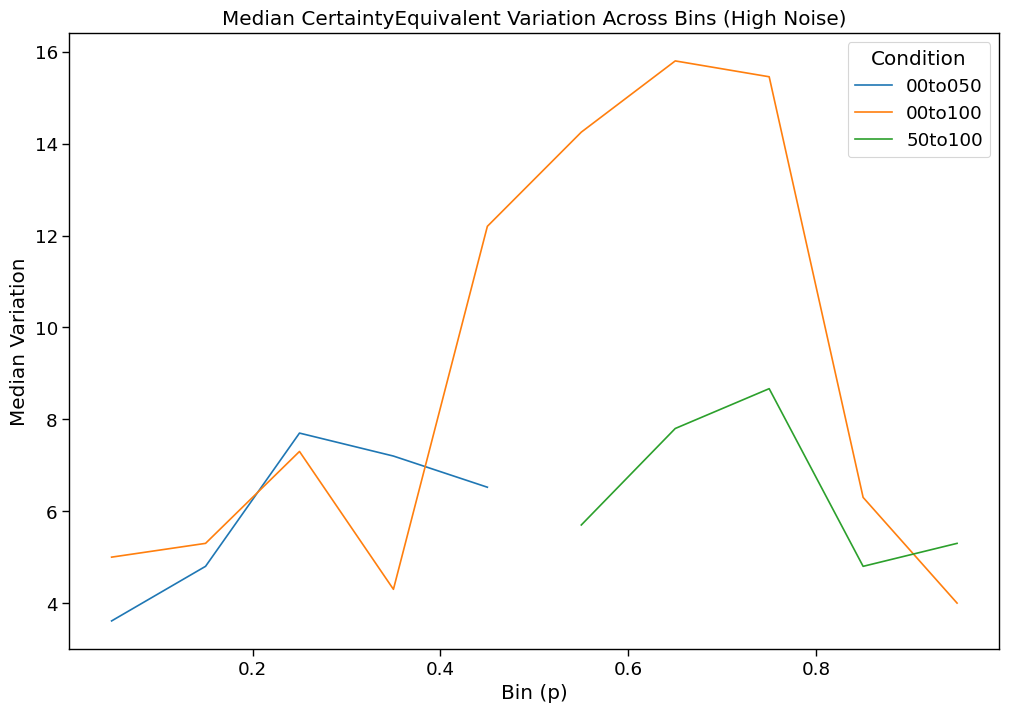

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1662598964.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_variation_per_bin_low = binwise_var[binwise_var['noiseType'] == 'lowNoise'].groupby(['p_bin2', 'probRange'])['var'].median().reset_index()


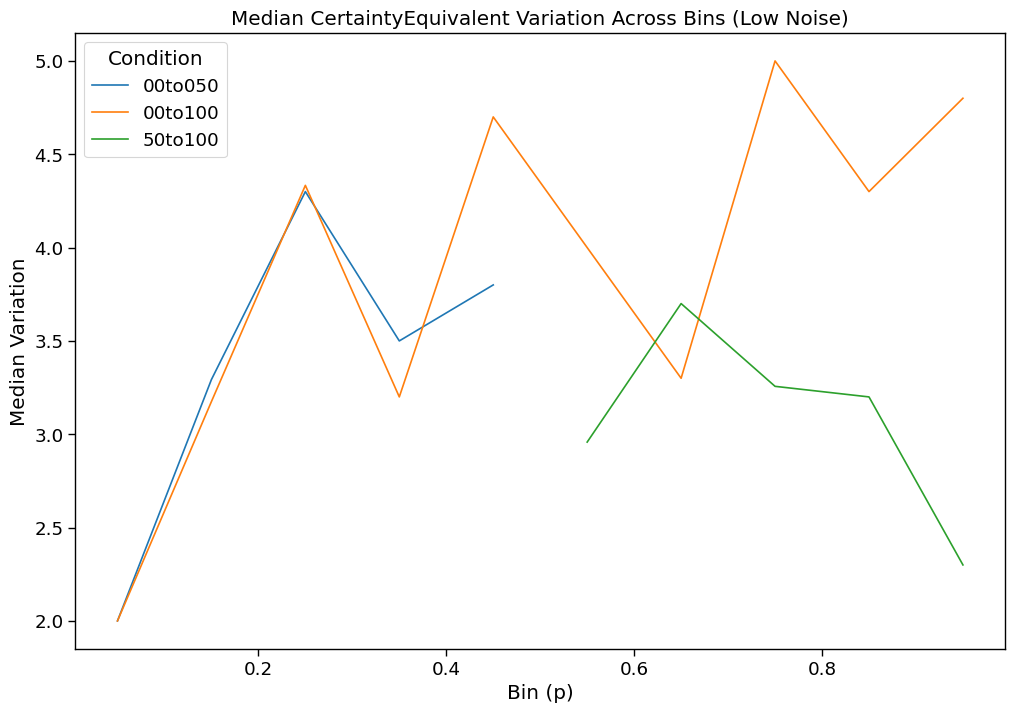

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the conditions
conditions = ["00to050", "00to100", "50to100"]
noise_types = ["highNoise", "lowNoise"]

# Specify the bin size for 'p'
bin_size = 0.05

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, 21)).apply(lambda x: x.mid).astype(float).round(3)

# Calculate the variation (variance) within each bin for each subject
binwise_var = filtered_df.groupby(['subject', 'noiseType', 'probRange', 'p_bin2'])['certaintyEquivalent'].var()
binwise_var = binwise_var.to_frame('var').reset_index()

# Plotting for high noise condition
plt.figure(figsize=(12, 8))
median_variation_per_bin_high = binwise_var[binwise_var['noiseType'] == 'highNoise'].groupby(['p_bin2', 'probRange'])['var'].median().reset_index()
sns.lineplot(data=median_variation_per_bin_high, x='p_bin2', y='var', hue='probRange', markers=True)

# Adjust layout for high noise condition
plt.title('Median CertaintyEquivalent Variation Across Bins (High Noise)')
plt.xlabel('Bin (p)')
plt.ylabel('Median Variation')
plt.legend(title='Condition')
plt.show()

# Plotting for low noise condition
plt.figure(figsize=(12, 8))
median_variation_per_bin_low = binwise_var[binwise_var['noiseType'] == 'lowNoise'].groupby(['p_bin2', 'probRange'])['var'].median().reset_index()
sns.lineplot(data=median_variation_per_bin_low, x='p_bin2', y='var', hue='probRange', markers=True)

# Adjust layout for low noise condition
plt.title('Median CertaintyEquivalent Variation Across Bins (Low Noise)')
plt.xlabel('Bin (p)')
plt.ylabel('Median Variation')
plt.legend(title='Condition')
plt.show()


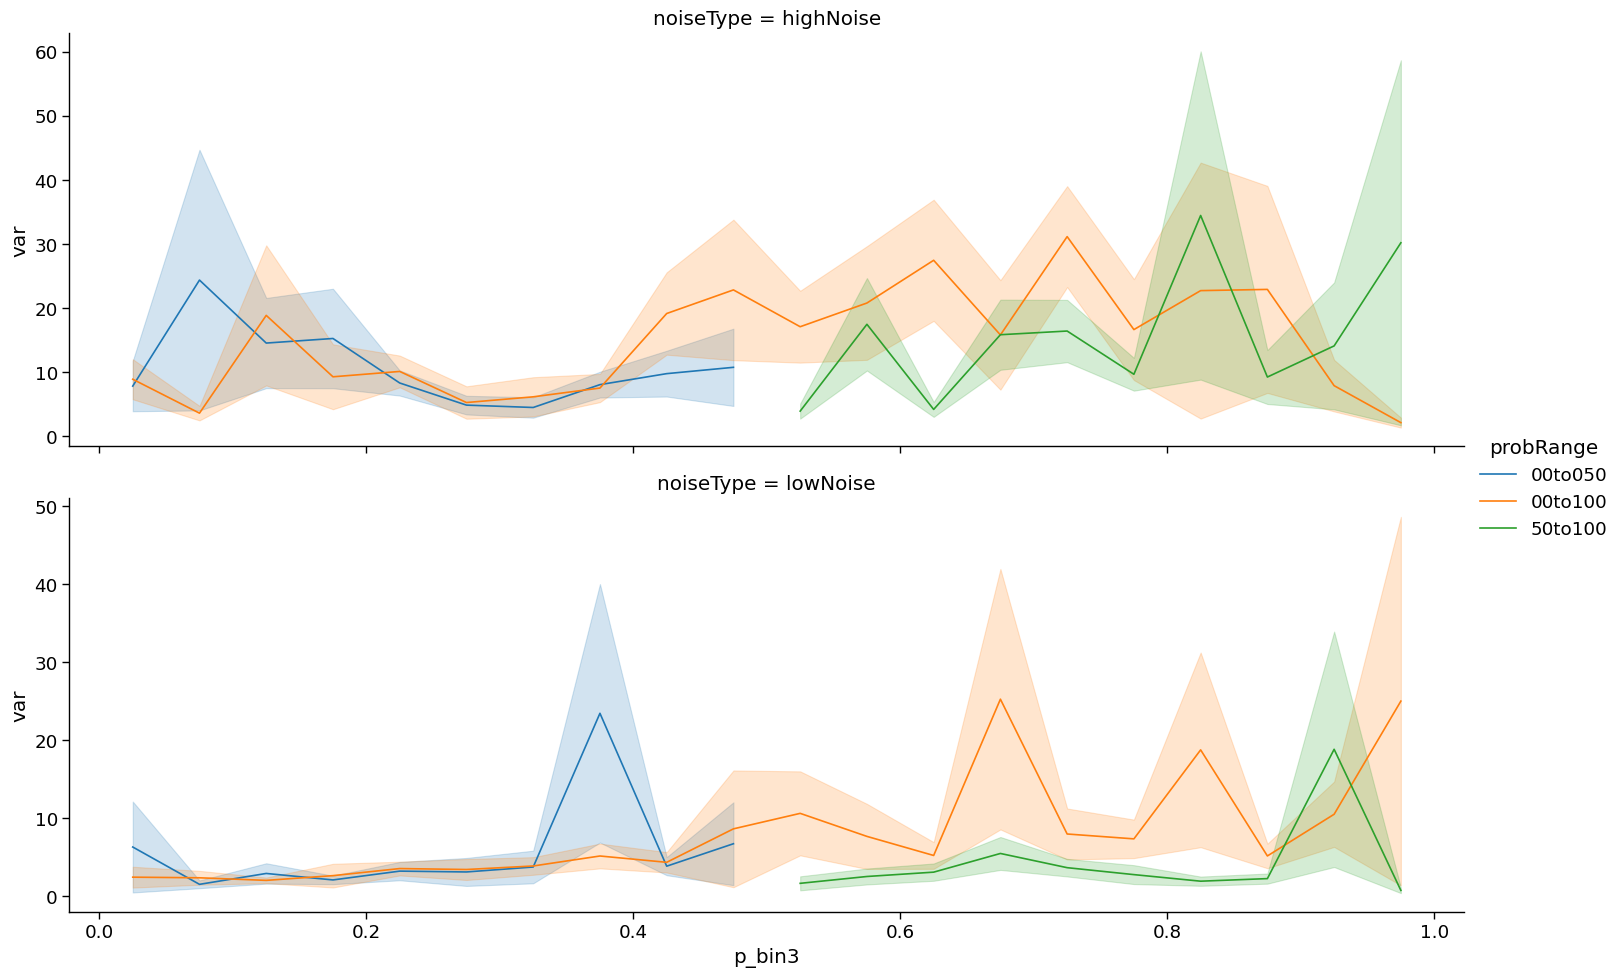

In [27]:
df['p_bin3'] = pd.cut(df['p'], np.linspace(0.0, 1, 21)).apply(lambda x: x.mid).astype(float).round(3)

binwise_var = df.groupby(['subject', 'noiseType', 'probRange', 'p_bin3'])['certaintyEquivalent'].var()
binwise_var = binwise_var.to_frame('var')

g = sns.relplot(x='p_bin3', y='var', hue='probRange', row='noiseType', data=binwise_var.reset_index(),
            kind='line', aspect=3., errorbar='se', facet_kws={'sharey':False}, markers=True)


In [28]:
tmp = binwise_var.unstack('p_bin3').droplevel(0, 1)[[0.475, 0.525]].stack()

tmp = tmp.to_frame('var')

tmp.groupby('p_bin3').apply(lambda d: pg.rm_anova(data=d.reset_index(), dv='var', within=['noiseType', 'probRange'], subject='subject'))

/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the

Source           SS  ddof1  ddof2           MS  \
p_bin3                                                                    
0.475  0              noiseType  2004.457879      1     22  2004.457879   
       1              probRange  1302.840914      1     22  1302.840914   
       2  noiseType * probRange   698.998784      1     22   698.998784   
0.525  0              noiseType   471.702972      1     23   471.702972   
       1              probRange  2937.379538      1     23  2937.379538   
       2  noiseType * probRange   105.156856      1     23   105.156856   

                 F     p-unc  p-GG-corr       ng2  eps  
p_bin3                                                  
0.475  0  1.159023  0.293333   0.293333  0.015132  1.0  
       1  1.068969  0.312411   0.312411  0.009888  1.0  
       2  0.537791  0.471092   0.471092  0.005329  1.0  
0.525  0  1.062497  0.313365   0.313365  0.013488  1.0  
       1  9.398775  0.005474   0.005474  0.078460  1.0  
       2  0.402367  0.532129   0.532129  0.003039  1.0

In [29]:
df.groupby(['probRange', 'p_bin3']).size()

probRange  p_bin3
00to050    0.025     144
           0.075      96
           0.125     144
           0.175      96
           0.225     144
           0.275      96
           0.325     120
           0.375     120
           0.425     144
           0.475      96
00to100    0.025     144
           0.075      96
           0.125     144
           0.175      96
           0.225     144
           0.275      96
           0.325     120
           0.375     120
           0.425     144
           0.475      96
           0.525     144
           0.575      96
           0.625     120
           0.675     120
           0.725     120
           0.775     120
           0.825     120
           0.875     120
           0.925     144
           0.975      96
50to100    0.525     144
           0.575      96
           0.625     120
           0.675     120
           0.725     120
           0.775     120
           0.825     120
           0.875     120
           0.925     144
       

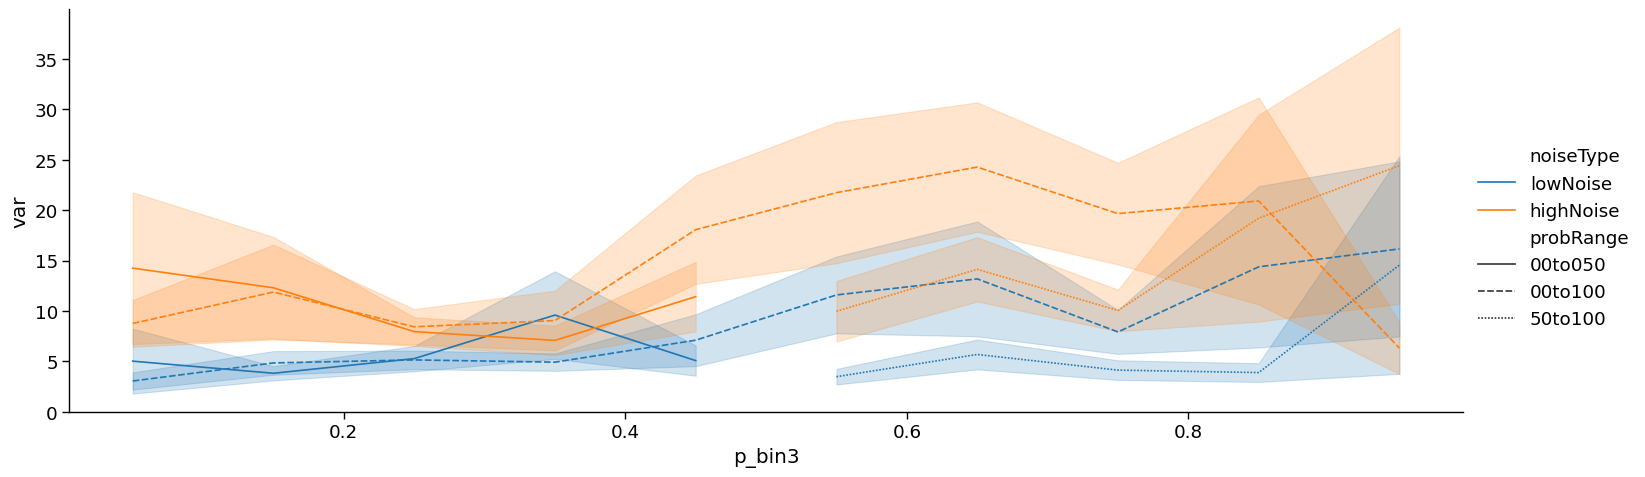

In [30]:
df['p_bin3'] = pd.cut(df['p'], np.linspace(0, 1, 11)).apply(lambda x: x.mid).astype(float).round(3)

binwise_var = df.groupby(['subject', 'noiseType', 'probRange', 'p_bin3'])['certaintyEquivalent'].var()
binwise_var = binwise_var.to_frame('var')

sns.relplot(x='p_bin3', y='var', style='probRange', hue='noiseType', data=binwise_var.reset_index(),
            kind='line', aspect=3., errorbar='se', hue_order=['lowNoise', 'highNoise'],)



# Correlations between bias and variance

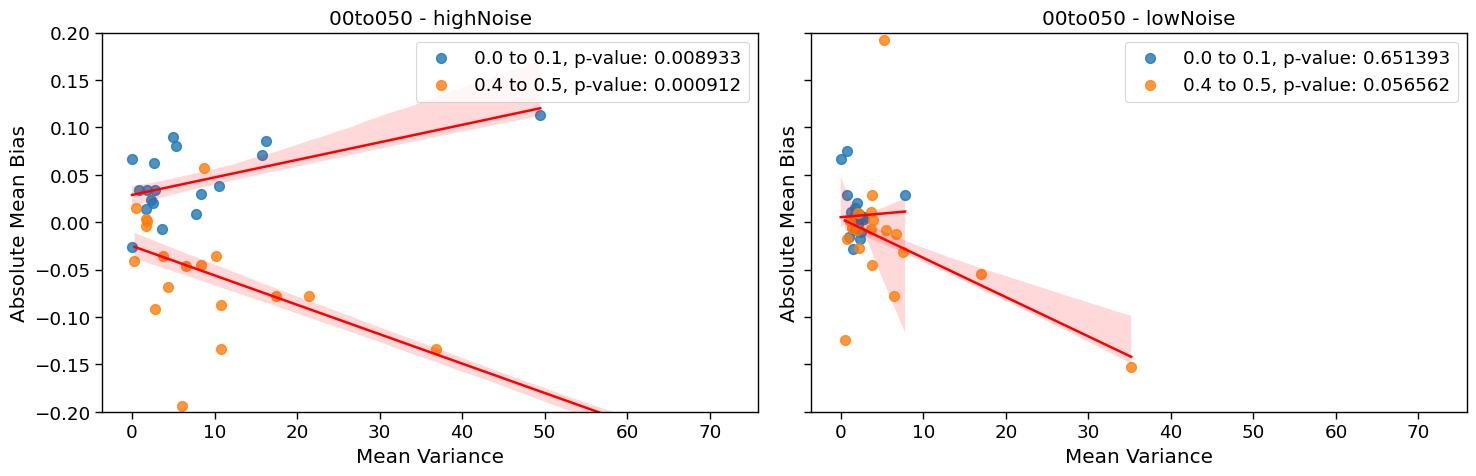

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the condition
condition = "00to050"
noise_types = ["highNoise", "lowNoise"]
z_threshold = 8  # Threshold for outliers

# Specify the bin size for 'p'
bin_size = 0.1
bins = int(1 / bin_size) + 1

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, bins)).apply(lambda x: x.mid).astype(float).round(3)

# Create subplots for each noiseType
fig, axes = plt.subplots(1, len(noise_types), figsize=(15, 5), sharex=True, sharey=True)

pt1 = 0.0
pt2 = 0.5
# Specify the ranges for separate plots
ranges = [(pt1, pt1 + bin_size), (pt2 - bin_size, pt2)]

# Iterate over noise types
for j, noise_type in enumerate(noise_types):
    # Create subplots for each range
    for k, p_range in enumerate(ranges):
        # Filter data for the specific condition, noise type, and range
        condition_df = filtered_df[
            (filtered_df['probRange'] == condition) &
            (filtered_df['noiseType'] == noise_type) &
            (filtered_df['p'] >= p_range[0]) & (filtered_df['p'] <= p_range[1])
        ]

        # Group by bin and calculate mean variance and mean bias for each subject
        binwise_data = condition_df.groupby(['subject', 'p_bin3']).agg(
            mean_variance=('certaintyEquivalent', 'var'),
            mean_bias=('bias', 'mean')
        ).reset_index()

        # Calculate IQR for mean_variance and mean_bias
        iqr_var = binwise_data['mean_variance'].quantile(0.75) - binwise_data['mean_variance'].quantile(0.25)
        iqr_bias = binwise_data['mean_bias'].quantile(0.75) - binwise_data['mean_bias'].quantile(0.25)

        # Define lower and upper bounds for outliers
        lower_bound_var = binwise_data['mean_variance'].quantile(0.25) - z_threshold * iqr_var
        upper_bound_var = binwise_data['mean_variance'].quantile(0.75) + z_threshold * iqr_var

        lower_bound_bias = binwise_data['mean_bias'].quantile(0.25) - z_threshold * iqr_bias
        upper_bound_bias = binwise_data['mean_bias'].quantile(0.75) + z_threshold * iqr_bias

        # Filter outliers
        outliers = (
                (binwise_data['mean_variance'] < lower_bound_var) | (binwise_data['mean_variance'] > upper_bound_var) |
                (binwise_data['mean_bias'] < lower_bound_bias) | (binwise_data['mean_bias'] > upper_bound_bias)
        )

        # Perform linear regression and obtain p-value for non-outliers
        non_outliers_data = binwise_data[~outliers]
        slope, intercept, r_value, p_value, std_err = linregress(x=non_outliers_data['mean_variance'],
                                                                 y=non_outliers_data['mean_bias'])

        # Plotting with absolute mean bias on y-axis and a correlation line with standard error shading
        sns.regplot(data=non_outliers_data, x='mean_variance', y=non_outliers_data['mean_bias'], ax=axes[j],
                    scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=68,
                    robust=True, label=f'{p_range[0]} to {p_range[1]}, p-value: {p_value:.6f}')

        axes[j].set_title(f'{condition} - {noise_type}')
        axes[j].set_xlabel('Mean Variance')
        axes[j].set_ylabel('Absolute Mean Bias')
        axes[j].set_ylim(-0.2, 0.2)  # Set y-axis limit

        # Add legend with p-value and confidence interval information
        axes[j].legend()

# Adjust layout
plt.tight_layout()
plt.show()


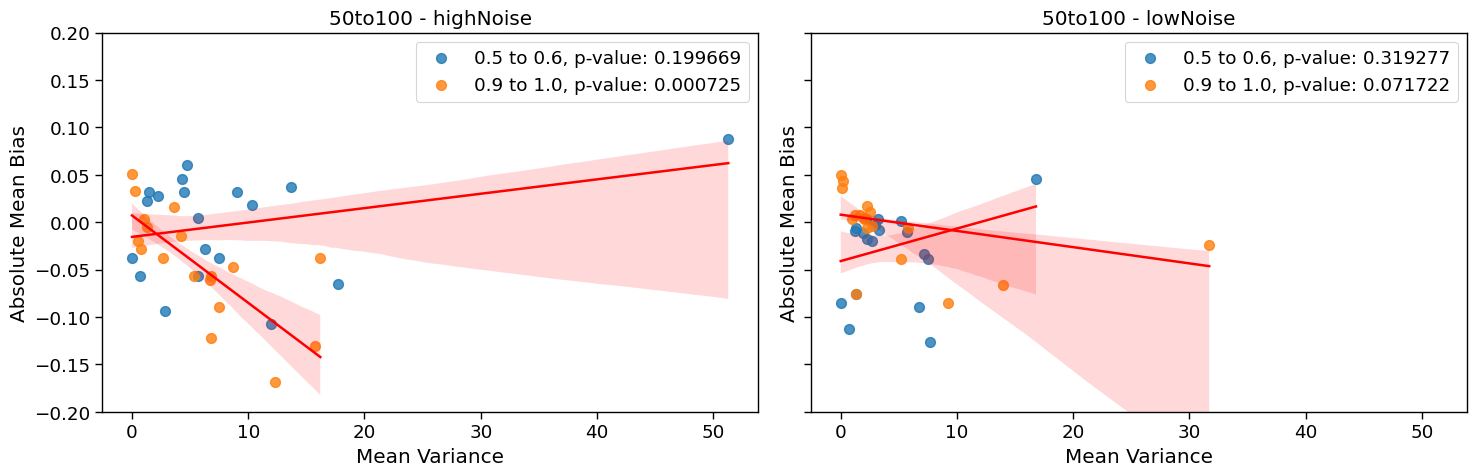

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the condition
condition = "50to100"
noise_types = ["highNoise", "lowNoise"]
z_threshold = 8  # Threshold for outliers

# Specify the bin size for 'p'
bin_size = 0.1
bins = int(1 / bin_size) + 1

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, bins)).apply(lambda x: x.mid).astype(float).round(3)

# Create subplots for each noiseType
fig, axes = plt.subplots(1, len(noise_types), figsize=(15, 5), sharex=True, sharey=True)

pt1 = 0.5
pt2 = 1.0
# Specify the ranges for separate plots
ranges = [(pt1, pt1 + bin_size), (pt2 - bin_size, pt2)]

# Iterate over noise types
for j, noise_type in enumerate(noise_types):
    # Create subplots for each range
    for k, p_range in enumerate(ranges):
        # Filter data for the specific condition, noise type, and range
        condition_df = filtered_df[
            (filtered_df['probRange'] == condition) &
            (filtered_df['noiseType'] == noise_type) &
            (filtered_df['p'] >= p_range[0]) & (filtered_df['p'] <= p_range[1])
        ]

        # Group by bin and calculate mean variance and mean bias for each subject
        binwise_data = condition_df.groupby(['subject', 'p_bin3']).agg(
            mean_variance=('certaintyEquivalent', 'var'),
            mean_bias=('bias', 'mean')
        ).reset_index()

        # Calculate IQR for mean_variance and mean_bias
        iqr_var = binwise_data['mean_variance'].quantile(0.75) - binwise_data['mean_variance'].quantile(0.25)
        iqr_bias = binwise_data['mean_bias'].quantile(0.75) - binwise_data['mean_bias'].quantile(0.25)

        # Define lower and upper bounds for outliers
        lower_bound_var = binwise_data['mean_variance'].quantile(0.25) - z_threshold * iqr_var
        upper_bound_var = binwise_data['mean_variance'].quantile(0.75) + z_threshold * iqr_var

        lower_bound_bias = binwise_data['mean_bias'].quantile(0.25) - z_threshold * iqr_bias
        upper_bound_bias = binwise_data['mean_bias'].quantile(0.75) + z_threshold * iqr_bias

        # Filter outliers
        outliers = (
                (binwise_data['mean_variance'] < lower_bound_var) | (binwise_data['mean_variance'] > upper_bound_var) |
                (binwise_data['mean_bias'] < lower_bound_bias) | (binwise_data['mean_bias'] > upper_bound_bias)
        )

        # Perform linear regression and obtain p-value for non-outliers
        non_outliers_data = binwise_data[~outliers]
        slope, intercept, r_value, p_value, std_err = linregress(x=non_outliers_data['mean_variance'],
                                                                 y=non_outliers_data['mean_bias'])

        # Plotting with absolute mean bias on y-axis and a correlation line with standard error shading
        sns.regplot(data=non_outliers_data, x='mean_variance', y=non_outliers_data['mean_bias'], ax=axes[j],
                    scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=68,
                    robust=True, label=f'{p_range[0]} to {p_range[1]}, p-value: {p_value:.6f}')

        axes[j].set_title(f'{condition} - {noise_type}')
        axes[j].set_xlabel('Mean Variance')
        axes[j].set_ylabel('Absolute Mean Bias')
        axes[j].set_ylim(-0.2, 0.2)  # Set y-axis limit

        # Add legend with p-value
        axes[j].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the condition
condition = "00to100"
noise_types = ["highNoise", "lowNoise"]
z_threshold = 8  # Threshold for outliers

# Specify the bin size for 'p'
bin_size = 0.1
bins = int(1 / bin_size) + 1

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, bins)).apply(lambda x: x.mid).astype(float).round(3)

# Create subplots for each noiseType
fig, axes = plt.subplots(1, len(noise_types), figsize=(15, 5), sharex=True, sharey=True)

pt1 = 0.0
pt2 = 1.0
# Specify the ranges for separate plots
ranges = [(pt1, pt1 + bin_size), (pt2 - bin_size, pt2)]

# Iterate over noise types
for j, noise_type in enumerate(noise_types):
    # Create subplots for each range
    for k, p_range in enumerate(ranges):
        # Filter data for the specific condition, noise type, and range
        condition_df = filtered_df[
            (filtered_df['probRange'] == condition) &
            (filtered_df['noiseType'] == noise_type) &
            (filtered_df['p'] >= p_range[0]) & (filtered_df['p'] <= p_range[1])
        ]

        # Group by bin and calculate mean variance and mean bias for each subject
        binwise_data = condition_df.groupby(['subject', 'p_bin3']).agg(
            mean_variance=('certaintyEquivalent', 'var'),
            mean_bias=('bias', 'mean')
        ).reset_index()

        # Calculate IQR for mean_variance and mean_bias
        iqr_var = binwise_data['mean_variance'].quantile(0.75) - binwise_data['mean_variance'].quantile(0.25)
        iqr_bias = binwise_data['mean_bias'].quantile(0.75) - binwise_data['mean_bias'].quantile(0.25)

        # Define lower and upper bounds for outliers
        lower_bound_var = binwise_data['mean_variance'].quantile(0.25) - z_threshold * iqr_var
        upper_bound_var = binwise_data['mean_variance'].quantile(0.75) + z_threshold * iqr_var

        lower_bound_bias = binwise_data['mean_bias'].quantile(0.25) - z_threshold * iqr_bias
        upper_bound_bias = binwise_data['mean_bias'].quantile(0.75) + z_threshold * iqr_bias

        # Filter outliers
        outliers = (
                (binwise_data['mean_variance'] < lower_bound_var) | (binwise_data['mean_variance'] > upper_bound_var) |
                (binwise_data['mean_bias'] < lower_bound_bias) | (binwise_data['mean_bias'] > upper_bound_bias)
        )

        # Perform linear regression and obtain p-value for non-outliers
        non_outliers_data = binwise_data[~outliers]
        slope, intercept, r_value, p_value, std_err = linregress(x=non_outliers_data['mean_variance'],
                                                                 y=non_outliers_data['mean_bias'])

        # Plotting with absolute mean bias on y-axis and a correlation line with standard error shading
        sns.regplot(data=non_outliers_data, x='mean_variance', y=non_outliers_data['mean_bias'], ax=axes[j],
                    scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=68,
                    robust=True, label=f'{p_range[0]} to {p_range[1]}, p-value: {p_value:.6f}')

        axes[j].set_title(f'{condition} - {noise_type}')
        axes[j].set_xlabel('Mean Variance')
        axes[j].set_ylabel('Absolute Mean Bias')
        axes[j].set_ylim(-0.2, 0.2)  # Set y-axis limit

        # Add legend with p-value
        axes[j].legend()

# Adjust layout
plt.tight_layout()
plt.show()


# Relation of bias anfd varianvce in bins

The following is kind of like a between subject measure, subjects with higher variance in bins also have higher bias dependin g on bin

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the condition and noise types
condition = "00to050"
noise_types = ["highNoise", "lowNoise"]

# Specify the bin size for 'p'
bin_size = 0.1
bins = int(1 / bin_size) + 1

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, bins)).apply(lambda x: x.mid).astype(float).round(3)

# Create dictionaries to store correlation, slope, and standard error values
corrFirst_high = {}
corrFirst_low = {}
slopes_first_high = {}
slopes_first_low = {}
std_err_first_high = {}  # New dictionary for standard errors
std_err_first_low = {}   # New dictionary for standard errors


# Iterate over noise types
for noise_type in noise_types:
    # Create a list to store data for different bins
    binwise_data_list = []

    # Iterate over bins
    for i in range(bins):
        # Calculate bin boundaries
        lower_bound = i * bin_size
        upper_bound = (i + 1) * bin_size

        # Filter data for the specific condition, noise type, and range
        condition_df = filtered_df[
            (filtered_df['probRange'] == condition) &
            (filtered_df['noiseType'] == noise_type) &
            (filtered_df['p'] >= lower_bound) & (filtered_df['p'] <= upper_bound)
        ]

        # Group by bin and calculate mean variance, mean bias, correlation, and slope for each subject
        binwise_data = condition_df.groupby(['subject', 'p_bin3']).agg(
            mean_variance=('certaintyEquivalent', 'var'),
            mean_bias=('bias', 'mean')
        ).reset_index()

        # Calculate correlation
        correlation = binwise_data['mean_variance'].corr(binwise_data['mean_bias'])
        # Save correlation based on noise type and condition
        if noise_type == "highNoise":
            corrFirst_high[f'bin_{i}'] = correlation
        else:
            corrFirst_low[f'bin_{i}'] = correlation

        # Check if there is enough data for the current bin before calculating the slope
        if len(binwise_data) >= 2:
            # Calculate slope
            slope, intercept, r_value, p_value, std_err = linregress(binwise_data['mean_variance'], binwise_data['mean_bias'])
            # Save slope based on noise type and condition
            if noise_type == "highNoise":
                slopes_first_high[f'bin_{i}'] = slope
            else:
                slopes_first_low[f'bin_{i}'] = slope

            # Save standard error based on noise type and condition
            if noise_type == "highNoise":
                std_err_first_high[f'bin_{i}'] = std_err
            else:
                std_err_first_low[f'bin_{i}'] = std_err

            # Calculate IQR for mean_variance and mean_bias
            iqr_var = binwise_data['mean_variance'].quantile(0.75) - binwise_data['mean_variance'].quantile(0.25)
            iqr_bias = binwise_data['mean_bias'].quantile(0.75) - binwise_data['mean_bias'].quantile(0.25)

            # Define lower and upper bounds for outliers
            lower_bound_var = binwise_data['mean_variance'].quantile(0.25) - z_threshold * iqr_var
            upper_bound_var = binwise_data['mean_variance'].quantile(0.75) + z_threshold * iqr_var

            lower_bound_bias = binwise_data['mean_bias'].quantile(0.25) - z_threshold * iqr_bias
            upper_bound_bias = binwise_data['mean_bias'].quantile(0.75) + z_threshold * iqr_bias

            # Filter outliers
            outliers = (
                    (binwise_data['mean_variance'] < lower_bound_var) | (binwise_data['mean_variance'] > upper_bound_var) |
                    (binwise_data['mean_bias'] < lower_bound_bias) | (binwise_data['mean_bias'] > upper_bound_bias)
            )

            # Remove outliers
            binwise_data = binwise_data[~outliers]

        # Add bin information to the DataFrame
        binwise_data['bin'] = i
        binwise_data['bin_range'] = f'{lower_bound:.2f} to {upper_bound:.2f}, Corr: {correlation:.3f}, Slope: {slope:.6f}'

        # Append to the list
        binwise_data_list.append(binwise_data)

    # Concatenate DataFrames for different bins
    combined_binwise_data = pd.concat(binwise_data_list, ignore_index=True)

    # Create a scatter plot with different colors for each bin
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(data=combined_binwise_data, x='mean_variance', y='mean_bias', hue='bin_range', palette='viridis', s=50)

    # Iterate over bins to plot regression lines
    for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):
        bin_data = combined_binwise_data[combined_binwise_data['bin_range'] == bin_value]
        color = handle.get_color()
        # Check if there is data for the current bin before plotting regression line
        if not bin_data.empty:
            slope, intercept, r_value, p_value, std_err = linregress(bin_data['mean_variance'], bin_data['mean_bias'])
            line = slope * bin_data['mean_variance'] + intercept
            plt.plot(bin_data['mean_variance'], line, color=color, linestyle='--', linewidth=2)

    plt.title(f'Bias and Variance Correlation Across Bins for {condition} - {noise_type}')
    plt.xlabel('Mean Variance')
    plt.ylabel('Absolute Mean Bias')
    plt.legend(title='Bin Range')

    # Show the plot
    plt.show()

# Print or use the correlation, slope, and standard error values as needed
print("Correlation Values for High Noise:", corrFirst_high)
print("Correlation Values for Low Noise:", corrFirst_low)
print("Slope Values for High Noise:", slopes_first_high)
print("Slope Values for Low Noise:", slopes_first_low)
print("Standard Error Values for High Noise:", std_err_first_high)
print("Standard Error Values for Low Noise:", std_err_first_low)


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/47669001.py:111: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/47669001.py:111: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):


Correlation Values for High Noise: {'bin_0': 0.7093939601287877, 'bin_1': 0.3302011447376599, 'bin_2': 0.18102175014485883, 'bin_3': -0.16748467293518188, 'bin_4': -0.6970008888338416, 'bin_5': nan, 'bin_6': nan, 'bin_7': nan, 'bin_8': nan, 'bin_9': nan, 'bin_10': nan}
Correlation Values for Low Noise: {'bin_0': 0.5829567346452416, 'bin_1': 0.1329399916839705, 'bin_2': 0.4628190684595858, 'bin_3': 0.12150590964823325, 'bin_4': -0.4444839660037218, 'bin_5': nan, 'bin_6': nan, 'bin_7': nan, 'bin_8': nan, 'bin_9': nan, 'bin_10': nan}
Slope Values for High Noise: {'bin_0': 0.0007683738688050711, 'bin_1': 0.0010700153422201603, 'bin_2': 0.0009557295001271298, 'bin_3': -0.0016853285795579128, 'bin_4': -0.0030118995351281807}
Slope Values for Low Noise: {'bin_0': 0.0010661316998367846, 'bin_1': 0.0012053432574571136, 'bin_2': 0.0037210992784946747, 'bin_3': 0.0002609274985259649, 'bin_4': -0.0038088677895717947}
Standard Error Values for High Noise: {'bin_0': 0.000185154401369379, 'bin_1': 0.

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/3151022026.py:106: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):


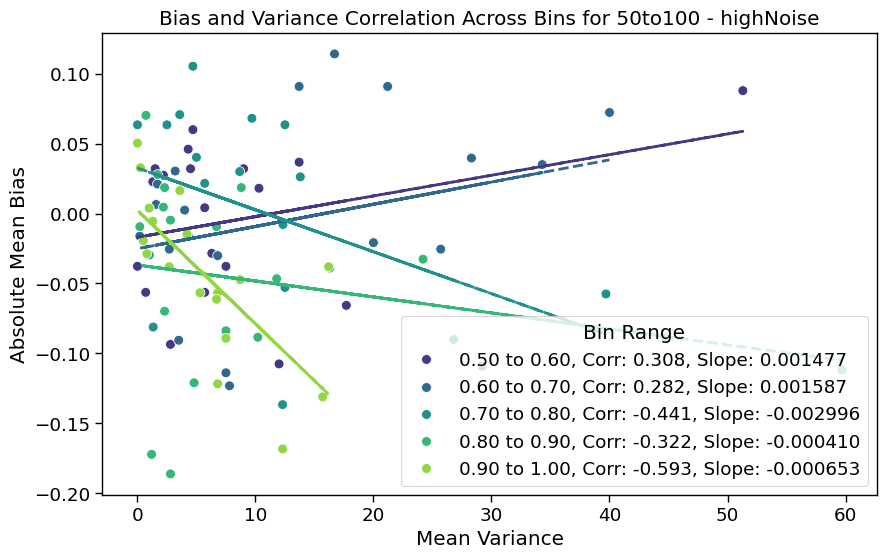

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/3151022026.py:106: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):


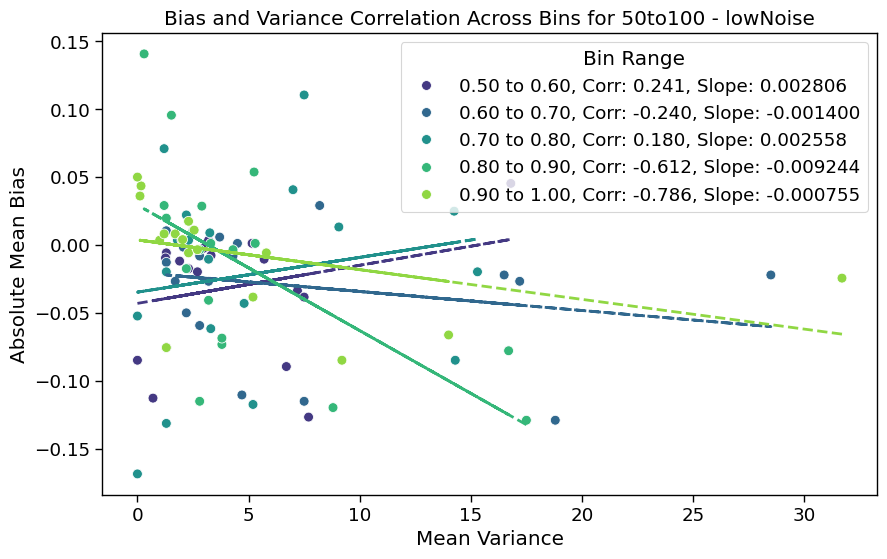

Correlation Values for High Noise: {'bin_0': nan, 'bin_1': nan, 'bin_2': nan, 'bin_3': nan, 'bin_4': nan, 'bin_5': 0.3079176671640977, 'bin_6': 0.28185225420519366, 'bin_7': -0.4409493561197453, 'bin_8': -0.3221800965111463, 'bin_9': -0.5933588681552188, 'bin_10': nan}
Correlation Values for Low Noise: {'bin_0': nan, 'bin_1': nan, 'bin_2': nan, 'bin_3': nan, 'bin_4': nan, 'bin_5': 0.24147413300507833, 'bin_6': -0.240375514196725, 'bin_7': 0.17970437329962846, 'bin_8': -0.6122478206846073, 'bin_9': -0.7857330770024588, 'bin_10': nan}
Slope Values for High Noise: {'bin_5': 0.0014767360137590496, 'bin_6': 0.0015865032636278394, 'bin_7': -0.0029957708205669664, 'bin_8': -0.0004101863079223952, 'bin_9': -0.0006526482239572392}
Slope Values for Low Noise: {'bin_5': 0.002806354627436873, 'bin_6': -0.0013999978241907016, 'bin_7': 0.002558163281911416, 'bin_8': -0.009243747566575712, 'bin_9': -0.0007552379841282092}
Standard Error Values for High Noise: {'bin_5': 0.0011066566100006014, 'bin_6':

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the condition and noise types
condition = "50to100"
noise_types = ["highNoise", "lowNoise"]

# Specify the bin size for 'p'
bin_size = 0.1
bins = int(1 / bin_size) + 1

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, bins)).apply(lambda x: x.mid).astype(float).round(3)

# Create dictionaries to store correlation, slope, and standard error values
corrSecond_high = {}
corrSecond_low = {}
slopes_second_high = {}
slopes_second_low = {}
std_err_second_high = {}  # New dictionary for standard errors
std_err_second_low = {}   # New dictionary for standard errors

# Iterate over noise types
for noise_type in noise_types:
    # Create a list to store data for different bins
    binwise_data_list = []

    # Iterate over bins
    for i in range(bins):
        # Calculate bin boundaries
        lower_bound = i * bin_size
        upper_bound = (i + 1) * bin_size

        # Filter data for the specific condition, noise type, and range
        condition_df = filtered_df[
            (filtered_df['probRange'] == condition) &
            (filtered_df['noiseType'] == noise_type) &
            (filtered_df['p'] >= lower_bound) & (filtered_df['p'] <= upper_bound)
        ]

        # Group by bin and calculate mean variance, mean bias, correlation, and slope for each subject
        binwise_data = condition_df.groupby(['subject', 'p_bin3']).agg(
            mean_variance=('certaintyEquivalent', 'var'),
            mean_bias=('bias', 'mean')
        ).reset_index()

        # Calculate correlation
        correlation = binwise_data['mean_variance'].corr(binwise_data['mean_bias'])
        # Save correlation based on noise type and condition
        if noise_type == "highNoise":
            corrSecond_high[f'bin_{i}'] = correlation
        else:
            corrSecond_low[f'bin_{i}'] = correlation

        # Check if there is enough data for the current bin before calculating the slope
        if len(binwise_data) >= 2:
            # Calculate slope
            slope, intercept, r_value, p_value, std_err = linregress(binwise_data['mean_variance'], binwise_data['mean_bias'])
            # Save slope based on noise type and condition
            if noise_type == "highNoise":
                slopes_second_high[f'bin_{i}'] = slope
                std_err_second_high[f'bin_{i}'] = std_err
            else:
                slopes_second_low[f'bin_{i}'] = slope
                std_err_second_low[f'bin_{i}'] = std_err

            # Calculate IQR for mean_variance and mean_bias
            iqr_var = binwise_data['mean_variance'].quantile(0.75) - binwise_data['mean_variance'].quantile(0.25)
            iqr_bias = binwise_data['mean_bias'].quantile(0.75) - binwise_data['mean_bias'].quantile(0.25)

            # Define lower and upper bounds for outliers
            lower_bound_var = binwise_data['mean_variance'].quantile(0.25) - z_threshold * iqr_var
            upper_bound_var = binwise_data['mean_variance'].quantile(0.75) + z_threshold * iqr_var

            lower_bound_bias = binwise_data['mean_bias'].quantile(0.25) - z_threshold * iqr_bias
            upper_bound_bias = binwise_data['mean_bias'].quantile(0.75) + z_threshold * iqr_bias

            # Filter outliers
            outliers = (
                    (binwise_data['mean_variance'] < lower_bound_var) | (binwise_data['mean_variance'] > upper_bound_var) |
                    (binwise_data['mean_bias'] < lower_bound_bias) | (binwise_data['mean_bias'] > upper_bound_bias)
            )

            # Remove outliers
            binwise_data = binwise_data[~outliers]

        # Add bin information to the DataFrame
        binwise_data['bin'] = i
        binwise_data['bin_range'] = f'{lower_bound:.2f} to {upper_bound:.2f}, Corr: {correlation:.3f}, Slope: {slope:.6f}'

        # Append to the list
        binwise_data_list.append(binwise_data)

    # Concatenate DataFrames for different bins
    combined_binwise_data = pd.concat(binwise_data_list, ignore_index=True)

    # Create a scatter plot with different colors for each bin
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(data=combined_binwise_data, x='mean_variance', y='mean_bias', hue='bin_range', palette='viridis', s=50)

    # Iterate over bins to plot regression lines
    for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):
        bin_data = combined_binwise_data[combined_binwise_data['bin_range'] == bin_value]
        color = handle.get_color()
        # Check if there is data for the current bin before plotting regression line
        if not bin_data.empty:
            slope, intercept, r_value, p_value, std_err = linregress(bin_data['mean_variance'], bin_data['mean_bias'])
            line = slope * bin_data['mean_variance'] + intercept
            plt.plot(bin_data['mean_variance'], line, color=color, linestyle='--', linewidth=2)

    plt.title(f'Bias and Variance Correlation Across Bins for {condition} - {noise_type}')
    plt.xlabel('Mean Variance')
    plt.ylabel('Absolute Mean Bias')
    plt.legend(title='Bin Range')

    # Show the plot
    plt.show()

# Print or use the correlation, slope, and standard error values as needed
print("Correlation Values for High Noise:", corrSecond_high)
print("Correlation Values for Low Noise:", corrSecond_low)
print("Slope Values for High Noise:", slopes_second_high)
print("Slope Values for Low Noise:", slopes_second_low)
print("Standard Error Values for High Noise:", std_err_second_high)
print("Standard Error Values for Low Noise:", std_err_second_low)


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1796842942.py:90: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):


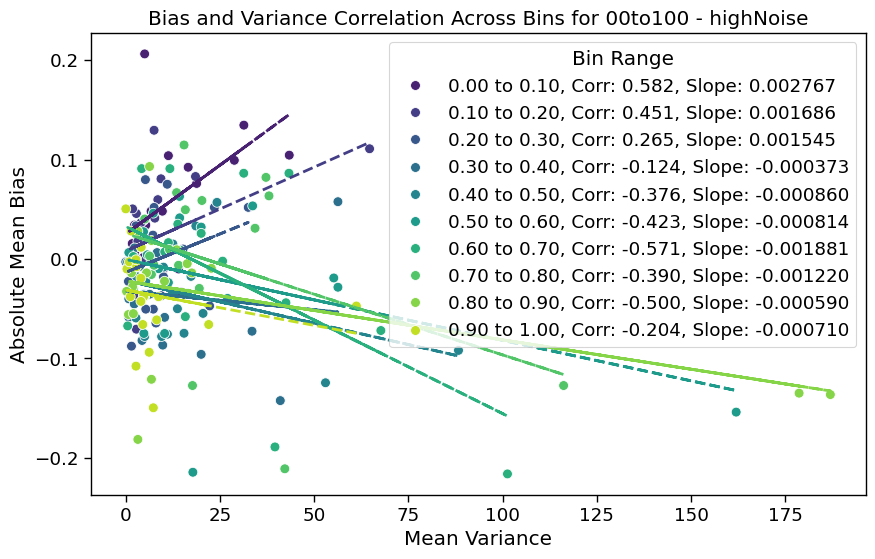

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_26306/1796842942.py:90: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):


Correlation Values for High Noise: {'bin_0': 0.5815704542172154, 'bin_1': 0.4507083402207288, 'bin_2': 0.26461295280846925, 'bin_3': -0.12385873579872107, 'bin_4': -0.37590861802779124, 'bin_5': -0.4227093927504128, 'bin_6': -0.5705491292919941, 'bin_7': -0.39012276840707316, 'bin_8': -0.4996307283594776, 'bin_9': -0.20352129700921828, 'bin_10': nan}
Correlation Values for Low Noise: {'bin_0': -0.008379133751627427, 'bin_1': 0.6383501249648221, 'bin_2': 0.12444784092800294, 'bin_3': -0.2568907590896462, 'bin_4': -0.18354161254687565, 'bin_5': -0.40797310568726347, 'bin_6': -0.35456468868715424, 'bin_7': -0.5117196705306194, 'bin_8': -0.5815797975092377, 'bin_9': -0.3783590570306492, 'bin_10': nan}
Slope Values for High Noise: {'bin_0': 0.002767333069362668, 'bin_1': 0.0016856876758224951, 'bin_2': 0.0015452410560692915, 'bin_3': -0.0003726763188703285, 'bin_4': -0.0008596706601759871, 'bin_5': -0.0008137656839581774, 'bin_6': -0.0018811091810398738, 'bin_7': -0.0012196087171414776, 'bi

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'filtered_df' containing the relevant data

# Specify the condition and noise types
condition = "00to100"
noise_types = ["highNoise", "lowNoise"]

# Specify the bin size for 'p'
bin_size = 0.1
bins = int(1 / bin_size) + 1

# Create bins for 'p' and round to 3 decimal places
filtered_df['p_bin3'] = pd.cut(filtered_df['p'], np.linspace(0.0, 1, bins)).apply(lambda x: x.mid).astype(float).round(3)

# Create dictionaries to store correlation and slope values
corrWhole_high = {}
corrWhole_low = {}
slopes_whole_high = {}
slopes_whole_low = {}
std_err_whole_high = {}
std_err_whole_low = {}

# Iterate over noise types
for noise_type in noise_types:
    # Create a list to store data for different bins
    binwise_data_list = []

    # Iterate over bins
    for i in range(bins):
        # Calculate bin boundaries
        lower_bound = i * bin_size
        upper_bound = (i + 1) * bin_size

        # Filter data for the specific condition, noise type, and range
        condition_df = filtered_df[
            (filtered_df['probRange'] == condition) &
            (filtered_df['noiseType'] == noise_type) &
            (filtered_df['p'] >= lower_bound) & (filtered_df['p'] <= upper_bound)
        ]

        # Group by bin and calculate mean variance, mean bias, correlation, and slope for each subject
        binwise_data = condition_df.groupby(['subject', 'p_bin3']).agg(
            mean_variance=('certaintyEquivalent', 'var'),
            mean_bias=('bias', 'mean')
        ).reset_index()

        # Calculate correlation
        correlation = binwise_data['mean_variance'].corr(binwise_data['mean_bias'])
        # Save correlation based on noise type and condition
        if noise_type == "highNoise":
            corrWhole_high[f'bin_{i}'] = correlation
        else:
            corrWhole_low[f'bin_{i}'] = correlation

        # Check if there is enough data for the current bin before calculating the slope
        if len(binwise_data) >= 2:
            # Calculate slope
            slope, intercept, r_value, p_value, std_err = linregress(binwise_data['mean_variance'], binwise_data['mean_bias'])
            # Save slope based on noise type and condition
            if noise_type == "highNoise":
                slopes_whole_high[f'bin_{i}'] = slope
            else:
                slopes_whole_low[f'bin_{i}'] = slope

            # Save standard error based on noise type and condition
            if noise_type == "highNoise":
                std_err_whole_high[f'bin_{i}'] = std_err
            else:
                std_err_whole_low[f'bin_{i}'] = std_err

        # Add bin information to the DataFrame
        binwise_data['bin'] = i
        binwise_data['bin_range'] = f'{lower_bound:.2f} to {upper_bound:.2f}, Corr: {correlation:.3f}, Slope: {slope:.6f}'

        # Append to the list
        binwise_data_list.append(binwise_data)

    # Concatenate DataFrames for different bins
    combined_binwise_data = pd.concat(binwise_data_list, ignore_index=True)

    # Create a scatter plot with different colors for each bin
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(data=combined_binwise_data, x='mean_variance', y='mean_bias', hue='bin_range', palette='viridis', s=50)

    # Iterate over bins to plot regression lines
    for bin_value, handle in zip(combined_binwise_data['bin_range'].unique(), scatter_plot.legend_.legendHandles):
        bin_data = combined_binwise_data[combined_binwise_data['bin_range'] == bin_value]
        color = handle.get_color()
        # Check if there is data for the current bin before plotting regression line
        if not bin_data.empty:
            slope, intercept, r_value, p_value, std_err = linregress(bin_data['mean_variance'], bin_data['mean_bias'])
            line = slope * bin_data['mean_variance'] + intercept
            plt.plot(bin_data['mean_variance'], line, color=color, linestyle='--', linewidth=2)

    plt.title(f'Bias and Variance Correlation Across Bins for {condition} - {noise_type}')
    plt.xlabel('Mean Variance')
    plt.ylabel('Absolute Mean Bias')
    plt.legend(title='Bin Range')

    # Show the plot
    plt.show()

# Print or use the correlation, slope, and standard error values as needed
print("Correlation Values for High Noise:", corrWhole_high)
print("Correlation Values for Low Noise:", corrWhole_low)
print("Slope Values for High Noise:", slopes_whole_high)
print("Slope Values for Low Noise:", slopes_whole_low)
print("Standard Error Values for High Noise:", std_err_whole_high)
print("Standard Error Values for Low Noise:", std_err_whole_low)

SIMPLER PLOT

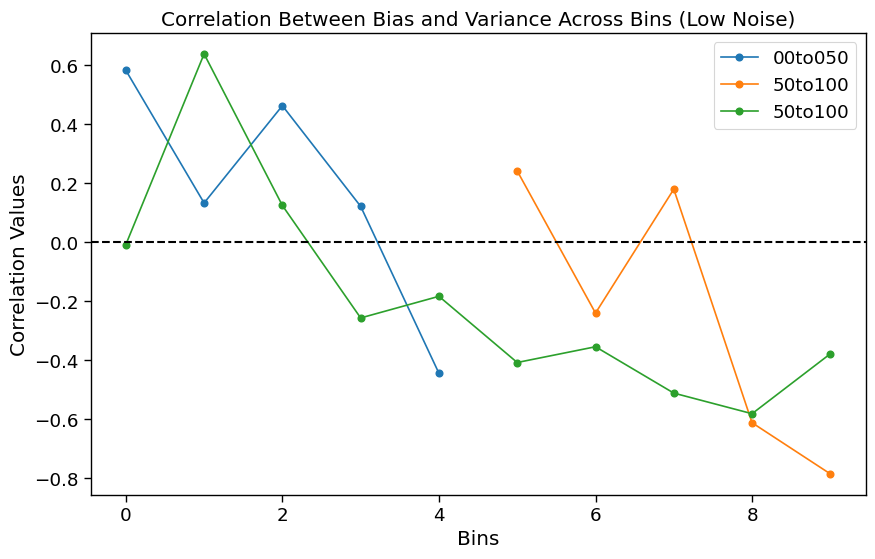

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Combine all dictionaries
correlations = {
    'corrFirst_high': corrFirst_high,
    'corrFirst_low': corrFirst_low,
    'corrSecond_high': corrSecond_high,
    'corrSecond_low': corrSecond_low,
    'corrWhole_high': corrWhole_high,
    'corrWhole_low': corrWhole_low
}

# Plotting for high noise conditions
plt.figure(figsize=(10, 6))

for label, corr_dict in correlations.items():
    if 'high' in label:
        bins = [int(key.split('_')[1]) for key in corr_dict.keys()]
        correlations_values = list(corr_dict.values())
        valid_indices = ~np.isnan(correlations_values)
        bins_filtered = np.array(bins)[valid_indices]
        correlations_filtered = np.array(correlations_values)[valid_indices]

        prob_range = '00to050' if 'First' in label else '50to100'  # Extract probRange from the label
        plt.plot(bins_filtered, correlations_filtered, label=f'{prob_range}', marker='o')
        
plt.axhline(y=0.0, color='black', linestyle='--', linewidth=1.5)  # Add black dotted line at 0.0 bias

plt.xlabel('Bins')
plt.ylabel('Correlation Values')
plt.title('Correlation Between Bias and Variance Across Bins (High Noise)')
plt.legend()
plt.show()

# Plotting for low noise conditions
plt.figure(figsize=(10, 6))

for label, corr_dict in correlations.items():
    if 'low' in label:
        bins = [int(key.split('_')[1]) for key in corr_dict.keys()]
        correlations_values = list(corr_dict.values())
        valid_indices = ~np.isnan(correlations_values)
        bins_filtered = np.array(bins)[valid_indices]
        correlations_filtered = np.array(correlations_values)[valid_indices]

        prob_range = '00to050' if 'First' in label else '50to100'  # Extract probRange from the label
        plt.plot(bins_filtered, correlations_filtered, label=f'{prob_range}', marker='o')

plt.axhline(y=0.0, color='black', linestyle='--', linewidth=1.5)  # Add black dotted line at 0.0 bias

plt.xlabel('Bins')
plt.ylabel('Correlation Values')
plt.title('Correlation Between Bias and Variance Across Bins (Low Noise)')
plt.legend()
plt.show()


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Combine all dictionaries
slopes = {
    'slopes_first_high': slopes_first_high,
    'slopes_first_low': slopes_first_low,
    'slopes_second_high': slopes_second_high,
    'slopes_second_low': slopes_second_low,
    'slopes_whole_high': slopes_whole_high,
    'slopes_whole_low': slopes_whole_low
}

std_errors = {
    'std_err_first_high': std_err_first_high,
    'std_err_first_low': std_err_first_low,
    'std_err_second_high': std_err_second_high,
    'std_err_second_low': std_err_second_low,
    'std_err_whole_high': std_err_whole_high,
    'std_err_whole_low': std_err_whole_low
}

# Plotting for high noise conditions
plt.figure(figsize=(10, 6))

for label, slope_dict in slopes.items():
    if 'high' in label:
        bins = [int(key.split('_')[1]) for key in slope_dict.keys()]
        slopes_values = list(slope_dict.values())
        
        std_err_label = label.replace('slopes', 'std_err')  # Adjust label for standard errors
        std_errors_values = list(std_errors[std_err_label].values())  # Extract standard errors
        
        valid_indices = ~np.isnan(slopes_values)
        bins_filtered = np.array(bins)[valid_indices]
        slopes_filtered = np.array(slopes_values)[valid_indices]
        std_errors_filtered = np.array(std_errors_values)[valid_indices]

        prob_range = '00to050' if 'first' in label else '50to100'  # Extract probRange from the label
        plt.errorbar(bins_filtered, slopes_filtered, yerr=std_errors_filtered, label=f'{prob_range}', marker='o')

plt.axhline(y=0.0, color='black', linestyle='--', linewidth=1.5)  # Add black dotted line at 0.0 slope

plt.xlabel('Bins')
plt.ylabel('Slope Values')
plt.title('Slope Values Between Bias and Variance Across Bins (High Noise)')
plt.legend()
plt.show()

# Plotting for low noise conditions
plt.figure(figsize=(10, 6))

for label, slope_dict in slopes.items():
    if 'low' in label:
        bins = [int(key.split('_')[1]) for key in slope_dict.keys()]
        slopes_values = list(slope_dict.values())
        
        std_err_label = label.replace('slopes', 'std_err')  # Adjust label for standard errors
        std_errors_values = list(std_errors[std_err_label].values())  # Extract standard errors
        
        valid_indices = ~np.isnan(slopes_values)
        bins_filtered = np.array(bins)[valid_indices]
        slopes_filtered = np.array(slopes_values)[valid_indices]
        std_errors_filtered = np.array(std_errors_values)[valid_indices]

        prob_range = '00to050' if 'first' in label else '50to100'  # Extract probRange from the label
        plt.errorbar(bins_filtered, slopes_filtered, yerr=std_errors_filtered, label=f'{prob_range}', marker='o')

plt.axhline(y=0.0, color='black', linestyle='--', linewidth=1.5)  # Add black dotted line at 0.0 slope

plt.xlabel('Bins')
plt.ylabel('Slope Values')
plt.title('Slope Values Between Bias and Variance Across Bins (Low Noise)')
plt.legend()
plt.show()


# 